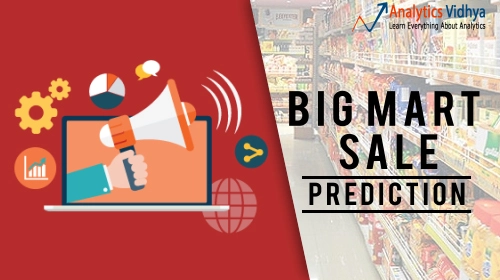

# Big Data Mart Sales Problem Project


# Problem Statement:


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different
cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive
model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role
in increasing the sales of their products.
The dataset includes two files:
- bigdatamart_Train.csv: Use this file for the model building purpose. 
- bigdatamart_Test.csv: Use this file for getting predictions from the trained model.

# Breakdown of the Problem Statement:
    .Supervised machine learning problem.
    . Regression problem .
    .The target value will be Item_Outlet_Sales.


# Aim of The project:
    The objective is to create a model that can predict Item_Outlet_Sales based on its features.



In [1]:
import pandas as pd
train_df=pd.read_csv('bigdatamart_train.csv')
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [2]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# About columns

Item_Identifier : Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Whether the product is low fat or not

Item_Visibility : The % of total display area of all products in a store allocated to the particular product

Item_Type : The category to which the product belongs

Item_MRP : Maximum Retail Price (list price) of the product

Outlet_Identifier : Unique store ID

Outlet_Establishment_Year : The year in which store was established

Outlet_Size : The size of the store in terms of ground area covered

Outlet_Location_Type : The type of city in which the store is located

Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of the product in the particular store.

# Exploratory data analysis:
    Exploratory Data Analysis or EDA is very crucial for the success of all data science projects. It is an approach to analyze and understand the various aspects of the data.




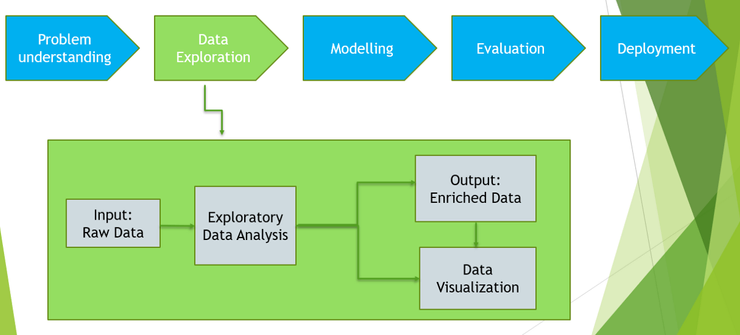

In [3]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


it shows the top five rows data in the dataset

In [4]:
train_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


 it shows the below five rows data in the dataset

In [5]:
train_df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
341,FDR24,17.35,Regular,0.062799,Baking Goods,88.1830,OUT013,1987,High,Tier 3,Supermarket Type1,539.2980
4120,FDP22,14.65,Regular,0.099333,Snack Foods,51.3666,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
2061,FDI02,15.70,Regular,0.115213,Canned,112.0202,OUT017,2007,NaN,Tier 2,Supermarket Type1,3150.5656
1460,FDP09,19.75,LF,0.033883,Snack Foods,213.2902,OUT035,2004,Small,Tier 2,Supermarket Type1,4247.8040
1093,FDQ46,7.51,Low Fat,0.103793,Snack Foods,110.1544,OUT035,2004,Small,Tier 2,Supermarket Type1,2684.5056


it shows the any of the sample rows data in the dataset

In [6]:
train_df.shape

(8523, 12)

it shows the how many number of rows and columns in the dataset

In [7]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

it shows the all columns name in the dataset

In [8]:
train_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

it will give the dtypes of data ie float int and object with columns name

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


It will shows the basic information about the data like how many columns and rows in the data and null value count
and dtype float or object or int

In [10]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

here showing the in a item_weight,outlet_size columns having a null value is present

In [11]:
train_df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

it shows the unique value no duplicate 

<AxesSubplot:>

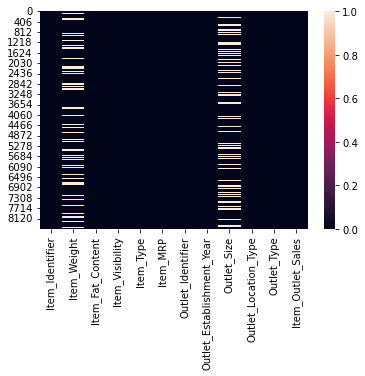

In [12]:
import seaborn as sns
sns.heatmap(train_df.isnull())

here showing that value is missing in this datasets

In [13]:
import numpy as np

In [14]:
#frist step to find out the  which columns has null value is presented 
features_with_na=[features for features in train_df.columns if train_df[features].isnull().sum()>0] 
#step2 to print the columns name and the percentage of missing values
for features in features_with_na:
    print(features,np.round(train_df[features].isnull().mean(),4),  '% missing values' )

Item_Weight 0.1717 % missing values
Outlet_Size 0.2828 % missing values


In [15]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
train_df["Item_Weight"]=train_df["Item_Weight"].fillna(train_df["Item_Weight"].mean())

In [17]:
train_df["Outlet_Size"]=train_df["Outlet_Size"].fillna(train_df["Outlet_Size"].mode()[0])


In [18]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

here showing that non of the value is missing 

<AxesSubplot:>

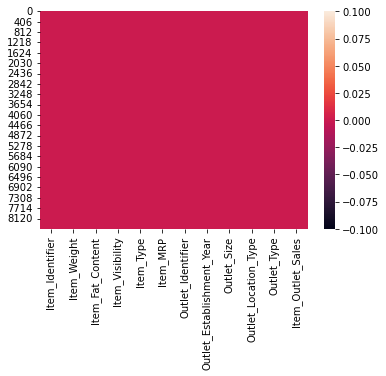

In [19]:
import seaborn as sns
sns.heatmap(train_df.isnull())

In [20]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


describe():- The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.


# key observations:
    std is high in columns like Item_MRP,Outlet_Establishment_Year,	Item_Outlet_Sales  is grether than 3std it means data is spread out and possibility is having outlier is present.
    mean is grether than median in a columns tem_MRP,Outlet_Establishment_Year,	Item_Outlet_Sales it means right skewed data in those columns.
    there is a difference between min value and 25th percentile in a  columns liitem_weight,item_MRP,Outlet_Establishment_Year,	Item_Outlet_Sales ,possibility is having a outliers there is outliers is present in a columns newspaper.
    also range of difference between 75th percentile and max value it means possibilities is having a outliers are present

Item_Weight                     AxesSubplot(0.125,0.536818;0.227941x0.343182)
Item_Visibility              AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Item_MRP                     AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Outlet_Establishment_Year          AxesSubplot(0.125,0.125;0.227941x0.343182)
Item_Outlet_Sales               AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

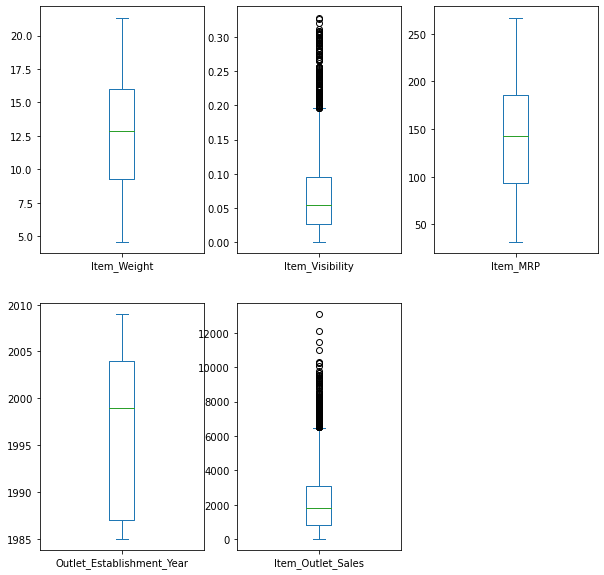

In [21]:
train_df.plot(kind='box',subplots=True,layout=(2,3),figsize=(10,10))

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.


Observations:
    here showig that in columns are item_visibility and item_outlet_sales are outliers are presented

In [22]:
#this columns are not required for modeling and visualizations this a unique product id
train_df.drop(['Item_Identifier'],axis=1,inplace=True)

In [23]:
#this columns are not required for modeling and visualizations this a unique store id
train_df.drop(['Outlet_Identifier'],axis=1,inplace=True)

In [24]:
train_df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
train_df['Item_Fat_Content']= train_df['Item_Fat_Content'].astype(str)

In [25]:
#separate the categorical feature from datasets for analysis 
categorical_features=[feature for feature in train_df.columns if train_df[feature].dtype=='O']
print("number of categorical features:", len(categorical_features))

number of categorical features: 5


In [26]:
categorical_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [27]:
train_df[categorical_features].head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [28]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
c=train_df['Item_Fat_Content'].value_counts()
c/c.sum()

Low Fat    0.647307
Regular    0.352693
Name: Item_Fat_Content, dtype: float64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

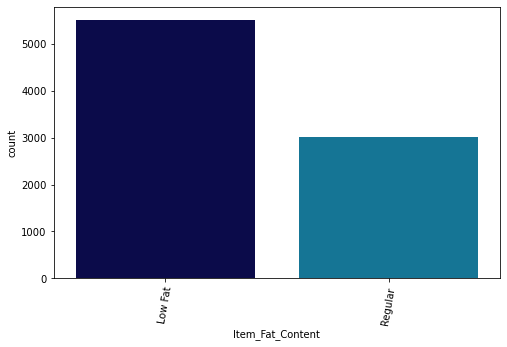

In [30]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=80)
sns.countplot('Item_Fat_Content',data=train_df,palette='ocean')

# observations:
    1. here showing that low fat item are more majority as compared to the other item_fat_content
    2. The Items bought are more of Low Fat,Regular item_fat also  has a good majority .
    3. other Item_Fat_Content are reverse trend

In [31]:
c=train_df['Item_Type'].value_counts()
c/c.sum()

Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

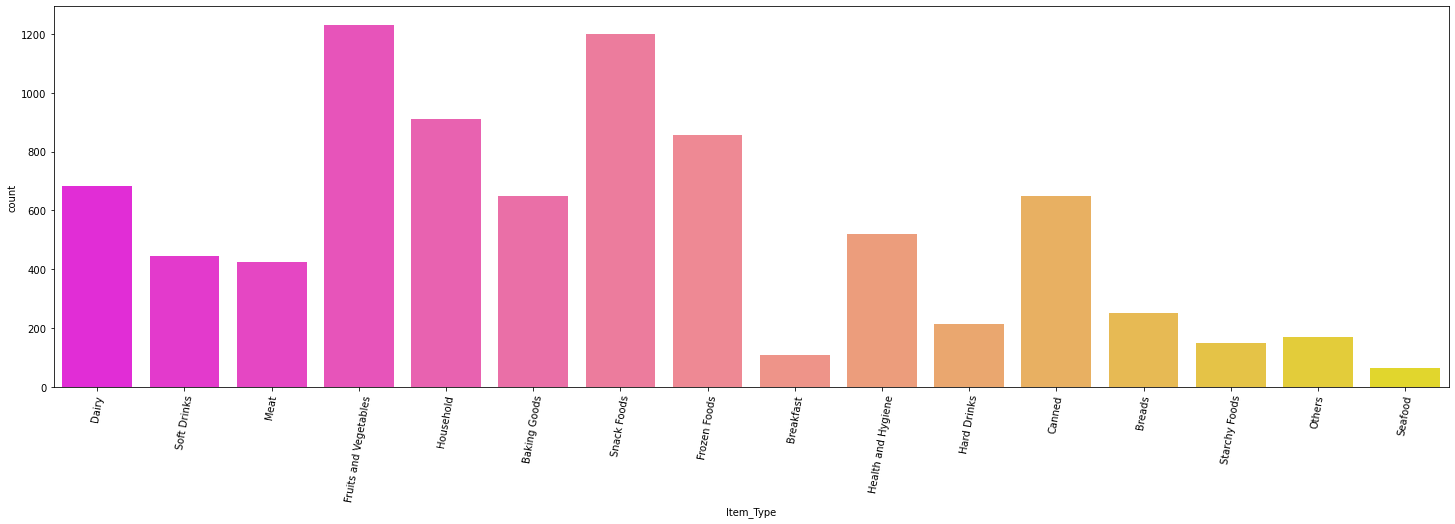

In [32]:
plt.figure(figsize=(25,7))
plt.xticks(rotation=80)
sns.countplot('Item_Type',data=train_df,palette='spring')

# Observations:
    1. here showing that Fruits and Vegetables are sales more as compared to other
    2. Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
    3.Snack Foods too have good sales.

In [33]:
c=train_df['Outlet_Size'].value_counts()
c/c.sum()

Medium    0.610466
Small     0.280183
High      0.109351
Name: Outlet_Size, dtype: float64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

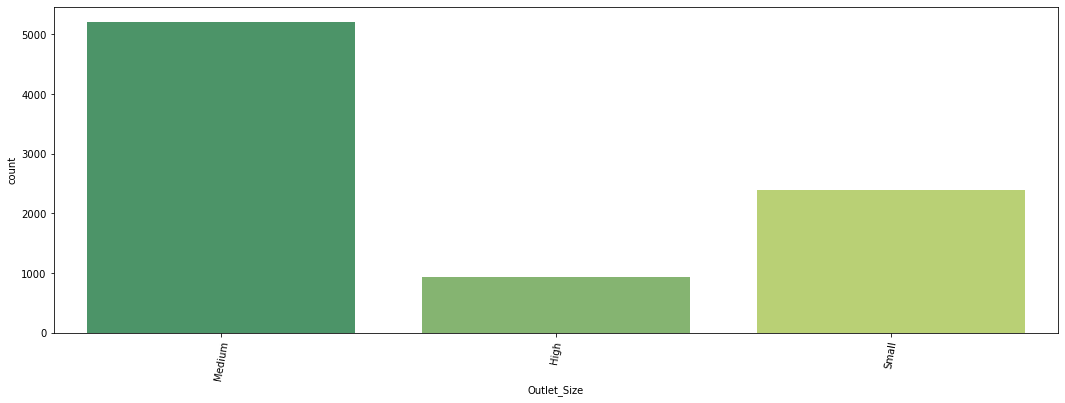

In [34]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=80)
sns.countplot('Outlet_Size',data=train_df,palette='summer')

# Observations:
    1.here showing that Median outlet_size quantity is more as compared to the other outlet_Size
    2.The Outlets are more of Medium Size

In [35]:
c=train_df['Outlet_Location_Type'].value_counts()
c/c.sum()

Tier 3    0.393054
Tier 2    0.326763
Tier 1    0.280183
Name: Outlet_Location_Type, dtype: float64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

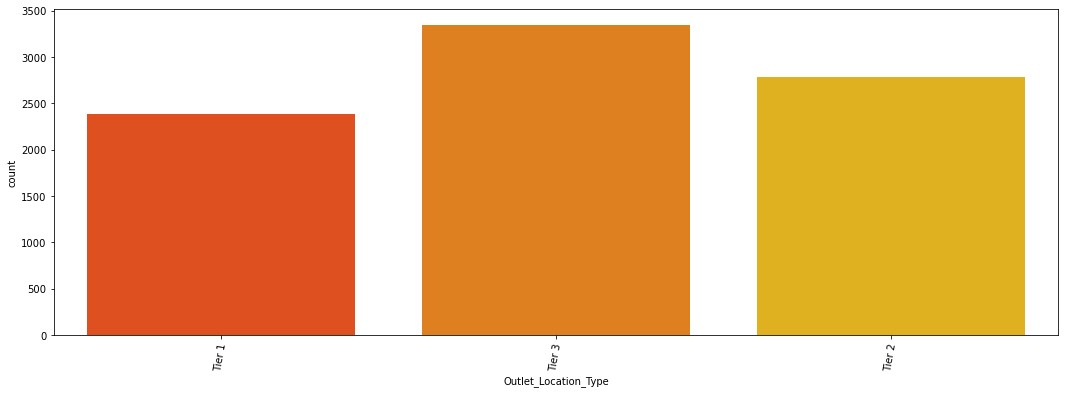

In [36]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=80)
sns.countplot('Outlet_Location_Type',data=train_df,palette='autumn')

# Observations:
    1. here showing that outlet_location_type Tier3 number are high as compared to other
    2. he Outlets are maximum in number in Tier 3 Cities.

In [37]:
c=train_df['Outlet_Type'].value_counts()
c/c.sum()

Supermarket Type1    0.654347
Grocery Store        0.127068
Supermarket Type3    0.109703
Supermarket Type2    0.108882
Name: Outlet_Type, dtype: float64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

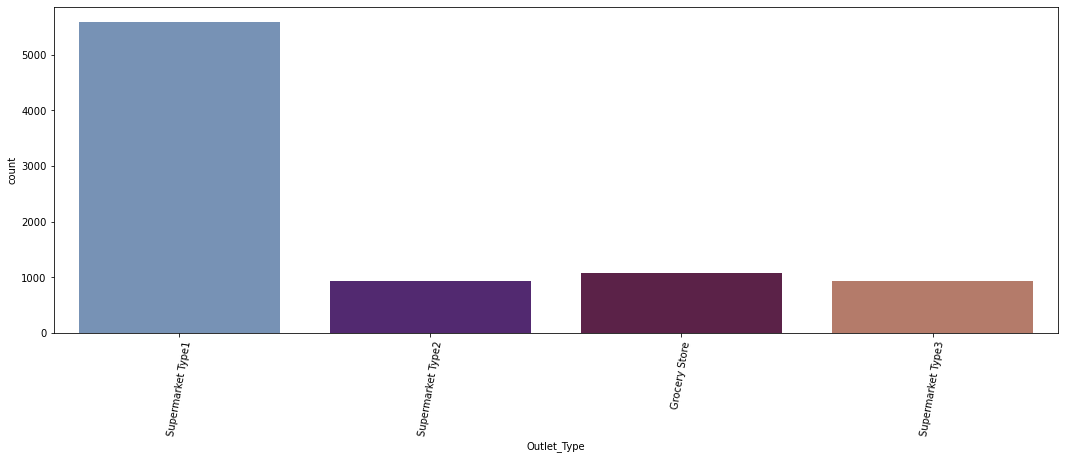

In [38]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=80)
sns.countplot('Outlet_Type',data=train_df,palette='twilight')

# observation:
    1. here showing that supermarket type1 majority is more as compared to other supermarkets 
    2. The Outlets are more of Supermarket Type1.

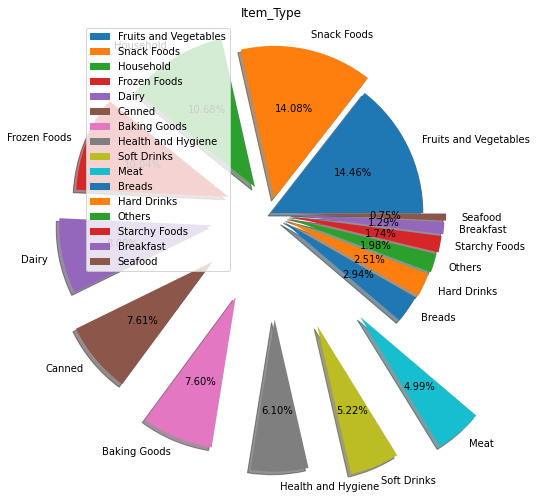

In [39]:
label=train_df['Item_Type'].value_counts().index
data=train_df['Item_Type'].value_counts().values
fig=plt.figure(figsize=(10,7))
plt.pie(data,labels =label,autopct="%.2f%%",shadow=True,explode=(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15))
plt.title('Item_Type')
plt.legend()
plt.show()

# Observations:
    1. here showing that Fruits and Vegetables are sales more as compared to other
    2. Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
    3.Snack Foods too have good sales.

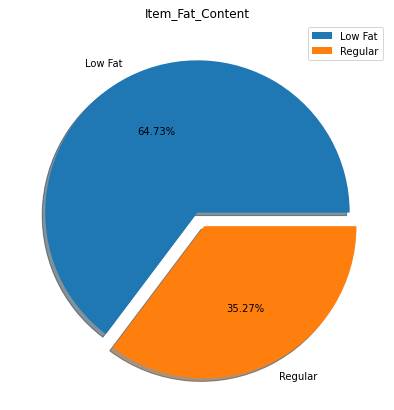

In [40]:
label=train_df['Item_Fat_Content'].value_counts().index
data=train_df['Item_Fat_Content'].value_counts().values
fig=plt.figure(figsize=(10,7))
plt.pie(data,labels =label,autopct="%.2f%%",shadow=True,explode=(0,0.1))
plt.title('Item_Fat_Content')
plt.legend()
plt.show()

# observations:
    1. here showing that low fat item are more majority as compared to the other item_fat_content
    2. The Items bought are more of Low Fat,Regular item_fat also  has a good majority .
    3. other Item_Fat_Content are reverse trend

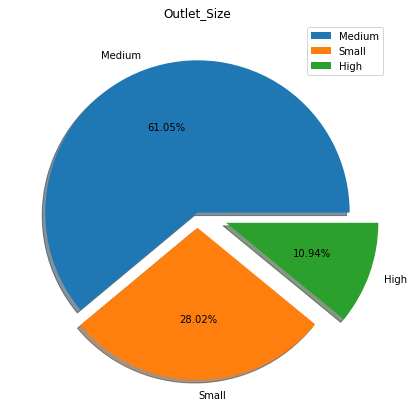

In [41]:
label=train_df['Outlet_Size'].value_counts().index
data=train_df['Outlet_Size'].value_counts().values
fig=plt.figure(figsize=(10,7))
plt.pie(data,labels =label,autopct="%.2f%%",shadow=True,explode=(0,0.1,0.2))
plt.title('Outlet_Size')
plt.legend()
plt.show()

# Observations:
    1.here showing that Median outlet_size quantity is more as compared to the other outlet_Size
    2.The Outlets are more of Medium Size

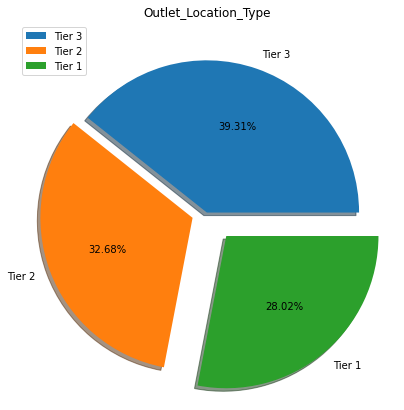

In [42]:
label=train_df['Outlet_Location_Type'].value_counts().index
data=train_df['Outlet_Location_Type'].value_counts().values
fig=plt.figure(figsize=(10,7))
plt.pie(data,labels =label,autopct="%.2f%%",shadow=True,explode=(0,0.1,0.2))
plt.title('Outlet_Location_Type')
plt.legend()
plt.show()

# Observations:
    1. here showing that outlet_location_type Tier3 number are high as compared to other
    2. he Outlets are maximum in number in Tier 3 Cities.

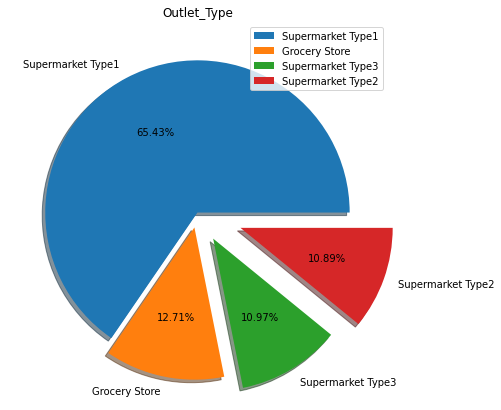

In [43]:
label=train_df['Outlet_Type'].value_counts().index
data=train_df['Outlet_Type'].value_counts().values
fig=plt.figure(figsize=(10,7))
plt.pie(data,labels =label,autopct="%.2f%%",shadow=True,explode=(0,0.1,0.2,0.3))
plt.title('Outlet_Type')
plt.legend()
plt.show()

# observation:
    1. here showing that supermarket type1 majority is more as compared to other supermarkets 
    2. The Outlets are more of Supermarket Type1.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

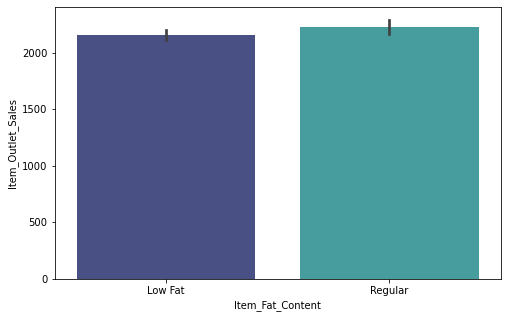

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train_df,palette='mako')

# observations:
    1.here showing that item_fat_content is high in both type of low fat and regular
    2.The Item Outles sales are high for both Low Fat and Regular Item types.

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

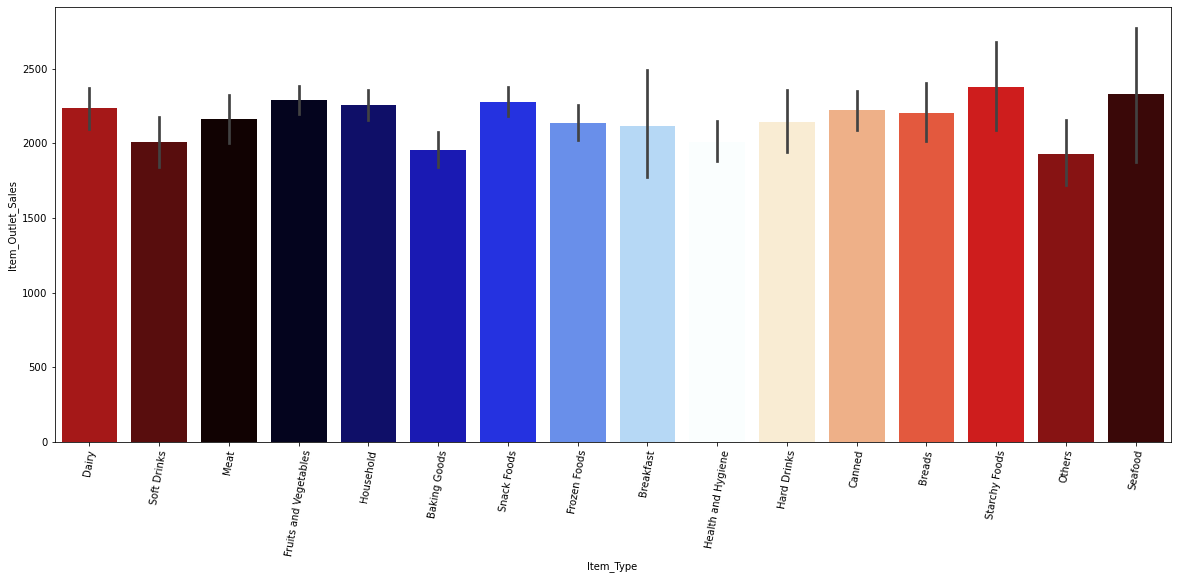

In [45]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=80)
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train_df,palette='flag')

# Observations:
    The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

In [46]:
categorical_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

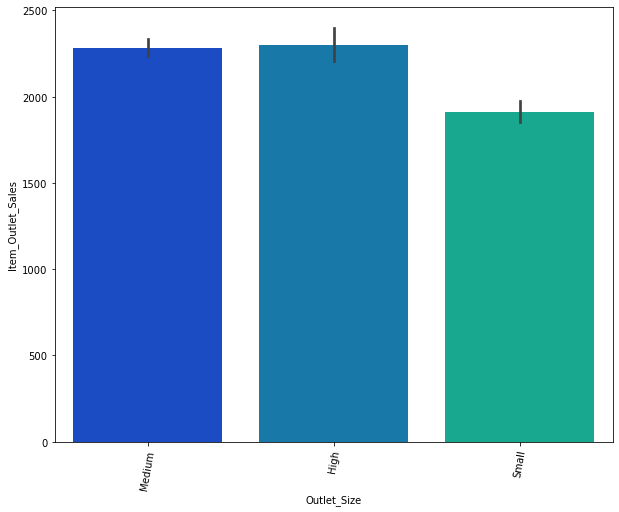

In [47]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=80)
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train_df,palette='winter')

# Observation:
    1. outlet_size is median and high has higher majority in a item_outlet_Sales
    2. The Outlet Sales is maximum for Medium and High sized Outlets.
    3.The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

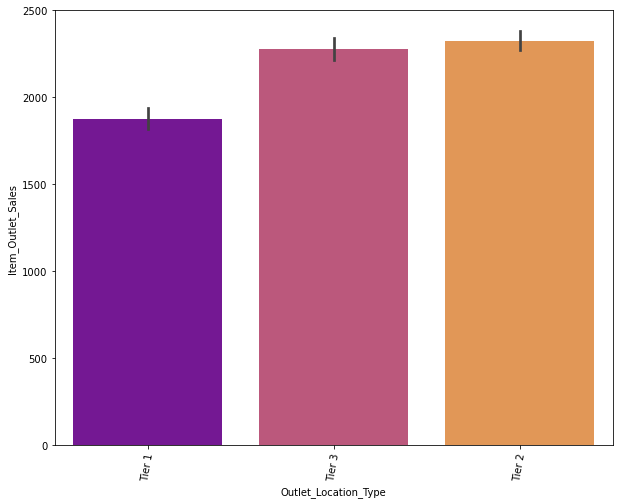

In [48]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=80)
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train_df,palette='plasma')

# Observations:
    1. here showing that item_outlet_Sales is higher in tier2 and tier3
    2. The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets.


<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

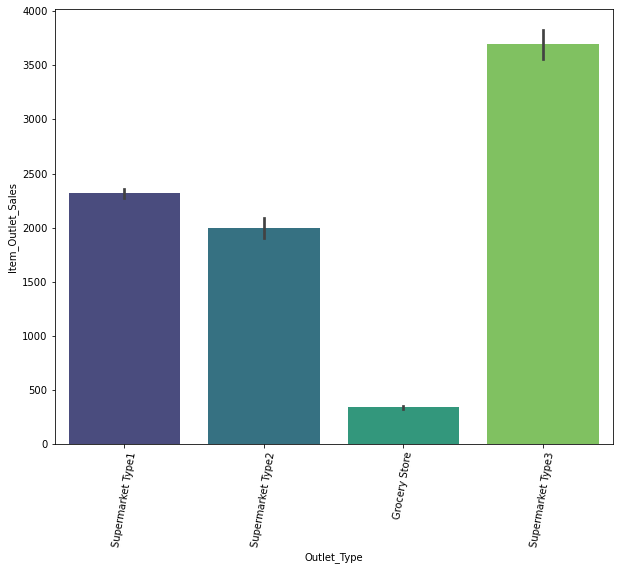

In [49]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=80)
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train_df,palette='viridis')

# Observations:
    1. here showing that item_outlet_Sales is higher in supermarket type3
    2. Grocery store item_outlet_sales is very low
    

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

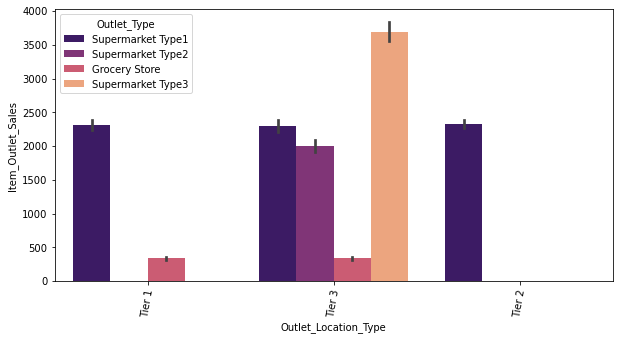

In [50]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=80)
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type',data=train_df,palette='magma')

# Observations:
    here showing that item_outlet_Sales is higher in tier3 outlet_location_type has high sales margin all types of supermarket

In [51]:
#separate the list of numerical variables and print out the numerical features
numerical_features =[feature for feature in train_df.columns if train_df[feature].dtypes != 'object' ]
print("number of numerical variables: " , len(numerical_features))

number of numerical variables:  5


In [52]:
numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [53]:
#head of numerical features
train_df[numerical_features].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

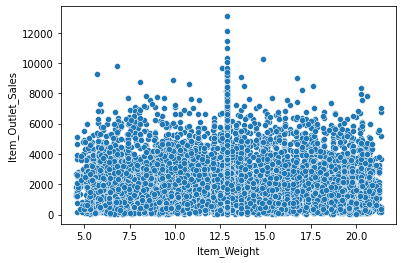

In [54]:
sns.scatterplot(x="Item_Weight", y="Item_Outlet_Sales" ,data=train_df)

# Observations:
    here showing that relationship of item_outlet_sales and item_weight is neutral the item_weight is 12.5 is more sales as compared
    to the other weight ,margin is more for this weight

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

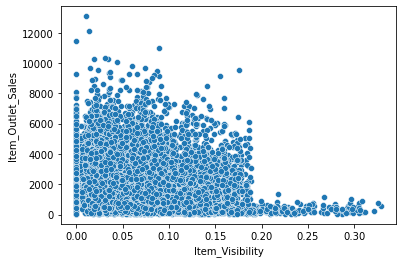

In [55]:
sns.scatterplot(x='Item_Visibility', y="Item_Outlet_Sales" ,data=train_df)

# Observations:
    Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

Lets consider it like missing information and impute it with mean visibility of that product.


In [56]:
train_df['Item_Visibility']=train_df['Item_Visibility'].replace(0,train_df['Item_Visibility'].mean())

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

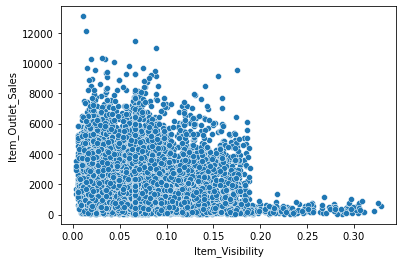

In [57]:
sns.scatterplot(x='Item_Visibility', y="Item_Outlet_Sales" ,data=train_df)

# Observations:
    We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

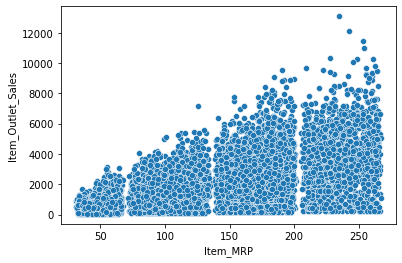

In [58]:
sns.scatterplot(x='Item_MRP', y="Item_Outlet_Sales" ,data=train_df)

# Observations:
    1.here showing that item MRP is ranging from 200 to 250 dollars having a high item_outlet_Sales 
    2. it is showing a positive relationships

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

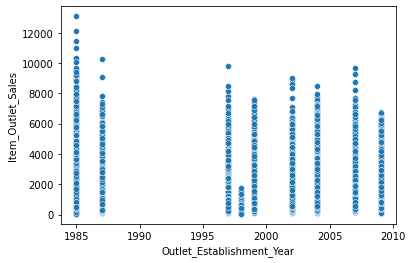

In [59]:
sns.scatterplot(x='Outlet_Establishment_Year', y="Item_Outlet_Sales" ,data=train_df)

# Observations:
    here showing that Establishment _year 1985 has good sales margin,here increases the year sales not improving ,here show
    that after 1985 sales are decresing, It means salesing is dependent upon customer interest
    

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

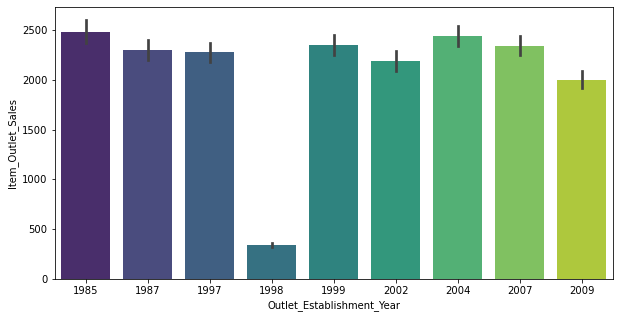

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Establishment_Year', y="Item_Outlet_Sales" ,data=train_df,palette='viridis')

# Observations:
    here showing that Establishment _year 1985 has good sales margin,here increases the year sales not improving ,here show
    that after 1985 sales are decresing, It means salesing is dependent upon customer interest
    

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>,
        <AxesSubplot:title={'center':'Item_MRP'}>],
       [<AxesSubplot:title={'center':'Outlet_Establishment_Year'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

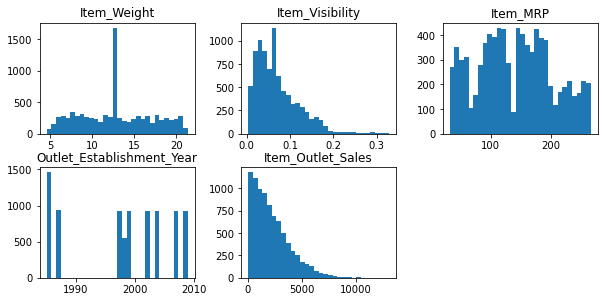

In [61]:
train_df.hist(figsize=(10,10), grid=False, layout=(4,3), bins = 30)


# Observations:
    here showing that item_visibility  and item_outlet_sales having a right skewed data is presented 

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

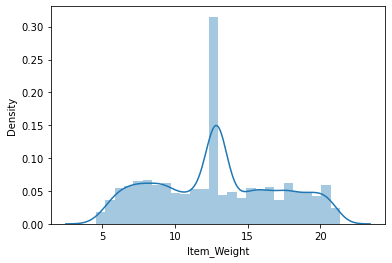

In [62]:
sns.distplot(train_df['Item_Weight'])

The Data in the columns is not normalized .The building blocks is out of the normalised curve

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

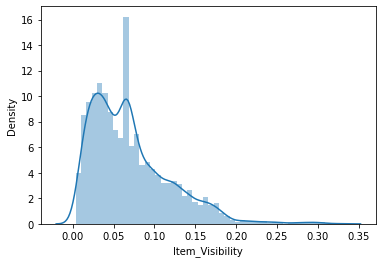

In [63]:
sns.distplot(train_df['Item_Visibility'])

The Data in the columns is not normalized .The building blocks is out of the normalised curve this columns having a right skewed data is presented 

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

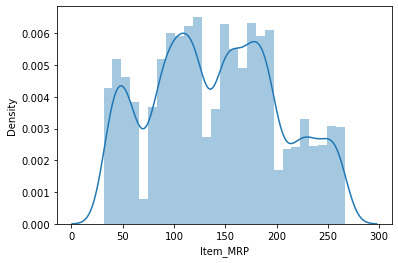

In [64]:
sns.distplot(train_df['Item_MRP'])

The Data in the columns is not normalized .The building blocks is out of the normalised curve

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

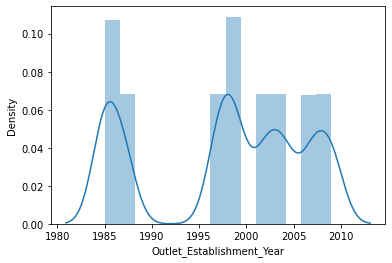

In [65]:
sns.distplot(train_df['Outlet_Establishment_Year'])

The Data in the columns is not normalized .The building blocks is out of the normalised curve

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

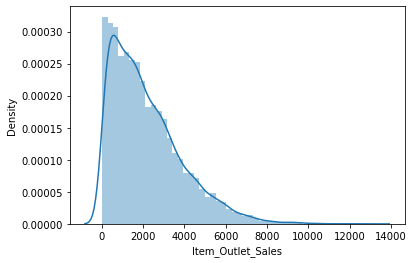

In [66]:
sns.distplot(train_df['Item_Outlet_Sales'])

The Data in the columns is not normalized .The building blocks is out of the normalised curve this columns having a right skewed data is presented 

In [67]:
print('Skewness: %f' % train_df['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %train_df['Item_Outlet_Sales'].kurt())

Skewness: 1.177531
Kurtsis: 1.615877


# Features Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [69]:
for val in categorical_features:
    le=LabelEncoder()
    train_df[val]=le.fit_transform(train_df[val].astype(str))

In [70]:
train_df[categorical_features].head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,4,1,0,1
1,1,14,1,2,2
2,0,10,1,0,1
3,1,6,1,2,0
4,0,9,0,2,1


# Correlations

In [71]:
dfc=train_df.corr()
dfc

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.017450,0.028015,0.024756,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,0.049915,-0.139434,0.006063,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.017450,0.049915,1.000000,-0.036000,-0.005259,-0.078355,0.072347,-0.027859,-0.179604,-0.134138
Item_Type,0.028015,-0.139434,-0.036000,1.000000,0.032651,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024756,0.006063,-0.005259,0.032651,1.000000,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,-0.008301,0.003151,-0.078355,0.004970,0.005020,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.007225,-0.000622,0.072347,-0.001859,0.006059,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.001598,-0.027859,0.003084,0.000232,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,-0.179604,0.003053,-0.001975,-0.122304,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.018719,-0.134138,0.017048,0.567574,-0.049135,-0.086182,0.089367,0.401522,1.000000


<AxesSubplot:>

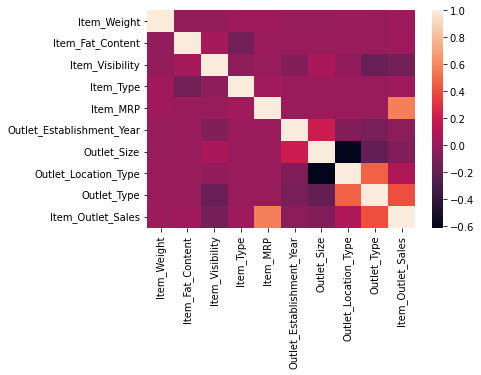

In [72]:
sns.heatmap(dfc)

<AxesSubplot:>

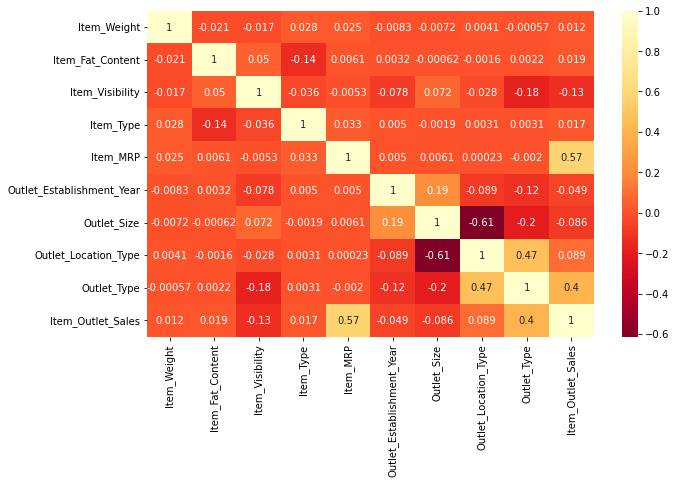

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(dfc,cmap="YlOrRd_r",annot=True)

The corr value is a number between -1 and 1. It tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1, the stronger the positive correlation. The closer to -1, the stronger the negative correlation (i.e., the more “opposite” the columns are). The closer to 0, the weaker the correlation.


# Observations:
    Item_MRP and Item_outlet_Sales  columns are highly correlated with each other 0.57 and 0.57
    OutletLocation_Type and Outlet_Type columns are highly correlated with each other 0.47 and 0.47
    Outlet_Size and Outlet_Location_Type columns are highly negative correlated with each other -0.61 and -0.61




# Removing the outliers:

In [74]:
from scipy.stats import zscore
import numpy as np

In [75]:
z=np.abs(zscore(train_df))
z

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.841872,0.738147,1.111358,0.766479,1.747454,0.139541,0.284581,1.369334,0.252658,0.910601
1,1.641706,1.354743,1.045067,1.608963,1.489023,1.334103,0.284581,1.091569,1.002972,1.018440
2,1.098554,0.738147,1.096733,0.658786,0.010040,0.139541,0.284581,1.369334,0.252658,0.049238
3,1.500838,1.354743,0.083740,0.291391,0.660050,0.020085,0.284581,1.091569,1.508289,0.849103
4,0.929428,0.738147,0.083740,0.421242,1.399220,1.293934,1.950437,1.091569,0.252658,0.695373
...,...,...,...,...,...,...,...,...,...,...
8518,1.418084,0.738147,0.275551,1.371418,1.180783,1.293934,1.950437,1.091569,0.252658,0.349915
8519,1.059578,1.354743,0.476643,1.716656,0.527301,0.497909,0.284581,0.138882,0.252658,0.956402
8520,0.534243,0.738147,0.718672,0.183698,0.897208,0.736822,1.381274,0.138882,0.252658,0.579100
8521,1.336444,1.354743,1.538968,1.371418,0.607977,1.334103,0.284581,1.091569,1.002972,0.196725


The abs() function of Pythons standard library returns the absolute value of the given number. Absolute value of a number is the value without considering its sign. Hence absolute of 10 is 10, -10 is also 10. If the number is a complex number, abs() returns its magnitude.
It will make all the data positive


In [76]:
threshold=3
print(np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  847,  854,
        935,  991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324,
       1434, 1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827,
       1841, 1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324,
       2439, 2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017,
       3083, 3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474,
       3488, 3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993,
       4006, 4219, 4289, 4346, 4349, 4382, 4408, 4530, 4538, 4656, 4674,
       4676, 4681, 4772, 4789, 4888, 4941, 4961, 4987, 4991, 5031, 5050,
       5065, 5150, 5177, 5185, 5223, 5287, 5315, 5374, 5500, 5550, 5619,
       5732, 5734, 5752, 5795, 5799, 5812, 5837, 5880, 5891, 5946, 5977,
       6000, 6008, 6012, 6134, 6179, 6334, 6409, 6536, 6537, 6541, 6576,
       6606, 6622, 6674, 6786, 6886, 6903, 6993, 7

In [77]:
Q1=train_df.quantile(0.25)
Q1

Item_Weight                     9.310000
Item_Fat_Content                0.000000
Item_Visibility                 0.033085
Item_Type                       4.000000
Item_MRP                       93.826500
Outlet_Establishment_Year    1987.000000
Outlet_Size                     1.000000
Outlet_Location_Type            0.000000
Outlet_Type                     1.000000
Item_Outlet_Sales             834.247400
Name: 0.25, dtype: float64

In [78]:
Q3=train_df.quantile(0.75)
Q3

Item_Weight                    16.000000
Item_Fat_Content                1.000000
Item_Visibility                 0.094585
Item_Type                      10.000000
Item_MRP                      185.643700
Outlet_Establishment_Year    2004.000000
Outlet_Size                     2.000000
Outlet_Location_Type            2.000000
Outlet_Type                     1.000000
Item_Outlet_Sales            3101.296400
Name: 0.75, dtype: float64

In [79]:
IQR=Q3-Q1
IQR

Item_Weight                     6.6900
Item_Fat_Content                1.0000
Item_Visibility                 0.0615
Item_Type                       6.0000
Item_MRP                       91.8172
Outlet_Establishment_Year      17.0000
Outlet_Size                     1.0000
Outlet_Location_Type            2.0000
Outlet_Type                     0.0000
Item_Outlet_Sales            2267.0490
dtype: float64

In [80]:
# REMOVING OUTLIERS USING IQR METHOD
df_new = train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
4,8.930,0,0.066132,9,53.8614,1987,0,2,1,994.7052
6,13.650,1,0.012741,13,57.6588,1987,0,2,1,343.5528
8,16.200,1,0.016687,5,96.9726,2002,1,1,1,1076.5986
...,...,...,...,...,...,...,...,...,...,...
8517,20.750,1,0.083607,5,178.8318,1997,2,0,1,3608.6360
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136


In [81]:
print("shape before and after")
print("shape before".ljust(20),":", train_df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (train_df.shape[0]-df_new.shape[0])/train_df.shape[0])

shape before and after
shape before         : (8523, 10)
shape after          : (5492, 10)
Percentage Loss      : 0.35562595330282765


In [82]:
y=df_new["Item_Outlet_Sales"]
y

0       3735.1380
2       2097.2700
4        994.7052
6        343.5528
8       1076.5986
          ...    
8517    3608.6360
8518    2778.3834
8519     549.2850
8520    1193.1136
8522     765.6700
Name: Item_Outlet_Sales, Length: 5492, dtype: float64

In [83]:
x=df_new.drop(['Item_Outlet_Sales'],axis=1)
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1999,1,0,1
2,17.500,0,0.016760,10,141.6180,1999,1,0,1
4,8.930,0,0.066132,9,53.8614,1987,0,2,1
6,13.650,1,0.012741,13,57.6588,1987,0,2,1
8,16.200,1,0.016687,5,96.9726,2002,1,1,1
...,...,...,...,...,...,...,...,...,...
8517,20.750,1,0.083607,5,178.8318,1997,2,0,1
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1


In [84]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel 

In [85]:
#apply fearure selection and specifying the lasso Regression model and selected a suitable alpha
#bigger the alpha less fearure that will be selected 
# then i use the selectfrommodel object from sklearn which will select the fearures which cofficients are non-zero

feature_sel_model=SelectFromModel(Lasso(alpha=0.001,random_state=0)) #remember that to set the seed value of random state
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [86]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False])

In [87]:
#lets print the number of total and selected features
selected_feat=x.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 9
selected features: 8
features with coefficients shrank to zero: 1


In [88]:
selected_feat

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type'],
      dtype='object')

In [89]:
x_train=df_new[selected_feat]
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type
0,9.300,0,0.016047,4,249.8092,1999,1,0
2,17.500,0,0.016760,10,141.6180,1999,1,0
4,8.930,0,0.066132,9,53.8614,1987,0,2
6,13.650,1,0.012741,13,57.6588,1987,0,2
8,16.200,1,0.016687,5,96.9726,2002,1,1
...,...,...,...,...,...,...,...,...
8517,20.750,1,0.083607,5,178.8318,1997,2,0
8518,6.865,0,0.056783,13,214.5218,1987,0,2
8519,8.380,1,0.046982,0,108.1570,2002,1,1
8520,10.600,0,0.035186,8,85.1224,2004,2,1


In [90]:
y_train=df_new['Item_Outlet_Sales']
y_train

0       3735.1380
2       2097.2700
4        994.7052
6        343.5528
8       1076.5986
          ...    
8517    3608.6360
8518    2778.3834
8519     549.2850
8520    1193.1136
8522     765.6700
Name: Item_Outlet_Sales, Length: 5492, dtype: float64

# Preprocessing of data

In [91]:
from sklearn.preprocessing import power_transform

In [92]:
df_new=power_transform(x,method="yeo-johnson")
df_new

array([[-0.72827419, -0.73932847, -1.41428723, ..., -0.26936812,
        -1.2781222 ,  0.        ],
       [ 0.99612025, -0.73932847, -1.3843892 , ..., -0.26936812,
        -1.2781222 ,  0.        ],
       [-0.81721955, -0.73932847,  0.23954029, ..., -1.65535747,
         1.53842138,  0.        ],
       ...,
       [-0.95193119,  1.35257878, -0.29714111, ..., -0.26936812,
         0.34228564,  0.        ],
       [-0.42545178, -0.73932847, -0.68245971, ...,  1.23189932,
         0.34228564,  0.        ],
       [ 0.47055996, -0.73932847, -0.36257612, ...,  1.23189932,
        -1.2781222 ,  0.        ]])

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, power_transform supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

By default, zero-mean, unit-variance normalization is applied to the transformed data.

In [93]:
x.shape[1]

9

In [94]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
def vif_calc(x):
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['variables']=x.columns
    return(vif)

In [96]:
vif_calc(x)

,VIF Factor,variables
0,1.003683,Item_Weight
1,1.024348,Item_Fat_Content
2,1.004669,Item_Visibility
3,1.023067,Item_Type
4,1.003172,Item_MRP
5,1.450967,Outlet_Establishment_Year
6,2.161239,Outlet_Size
7,1.722995,Outlet_Location_Type
8,141266.941675,Outlet_Type


 The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given models betas divide by the variane of a single beta if it were fit alone.
The numerical value for VIF tells you (in decimal form) what percentage the variance (i.e. the standard error squared) is inflated for each coefficient.
...
A rule of thumb for interpreting the variance inflation factor:
1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.


In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.76586239, -0.73932847, -1.16720957, ..., -0.24230201,
        -1.20994017,  0.        ],
       [ 1.00079733, -0.73932847, -1.15011603, ..., -0.24230201,
        -1.20994017,  0.        ],
       [-0.84557752, -0.73932847,  0.0339082 , ..., -1.69664371,
         1.69688022,  0.        ],
       ...,
       [-0.96407299,  1.35257878, -0.42533209, ..., -0.24230201,
         0.24347002,  0.        ],
       [-0.48578219, -0.73932847, -0.70822421, ...,  1.21203969,
         0.24347002,  0.        ],
       [ 0.4190923 , -0.73932847, -0.47579319, ...,  1.21203969,
        -1.20994017,  0.        ]])

# Machine learning models


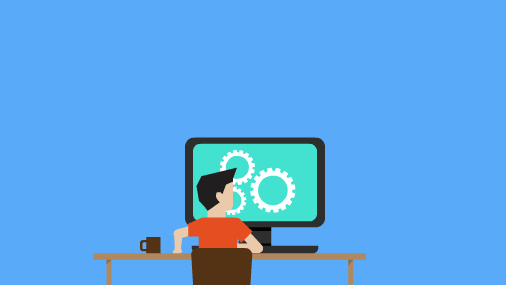

In the previuos seciton we have made X as the features and y as Item_Outlet_Sales  - the target value we want to predict.



# Assumptions:
    .This is a Linear Regression problem so we will use Regression algorithm .

    .Train test split will be a 75:25 ratio respectively.





# Models we will use:
    .LinearRegression
    .Lasso
    .Ridge
    .ElasticNet
    .DecisionTreeRegressor
    .KNeighborRegressor
    .SupportVectorRegressor
    .SGDRegressor
    .RandomForestRegressor
    .AdaBoostRegressor
    .GradientBoostRegressor
    .XGBRegressor

# r2_score:
    (coefficient of determination) regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a score of 0


In statistics, the coefficient of determination, denoted R² or r² and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable.
The coefficient of determination can also be found with the following formula: R2 = MSS/TSS = (TSS − RSS)/TSS, where MSS is the model sum of squares (also known as ESS, or explained sum of squares), which is the sum of the squares of the prediction from the linear regression minus the mean for that variable; TSS is the total sum of squares associated with the outcome variable, which is the sum of the squares of the measurements minus their mean; and RSS is the residual sum of squares, which is the sum of the squares of the measurements minus the prediction from the linear regression

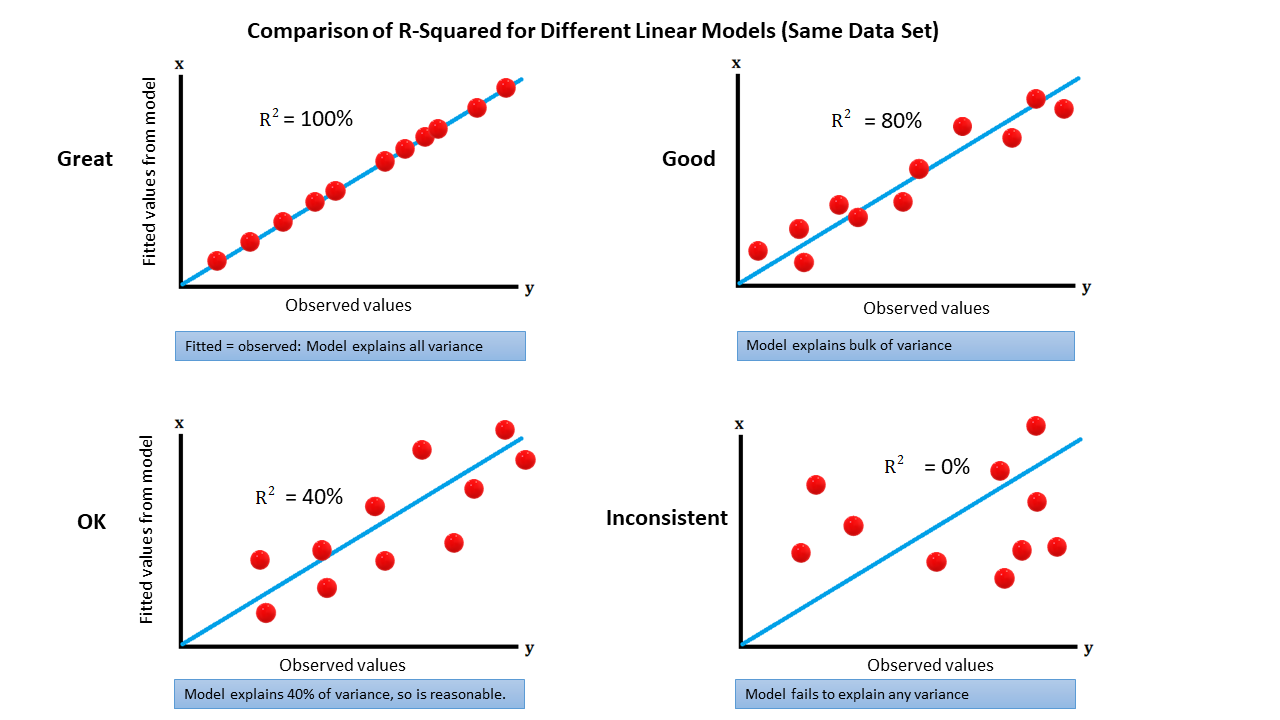

# coss_val_score:
    Cross-validation is a statistical method used to estimate the skill of machine learning models. ... That k-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset.


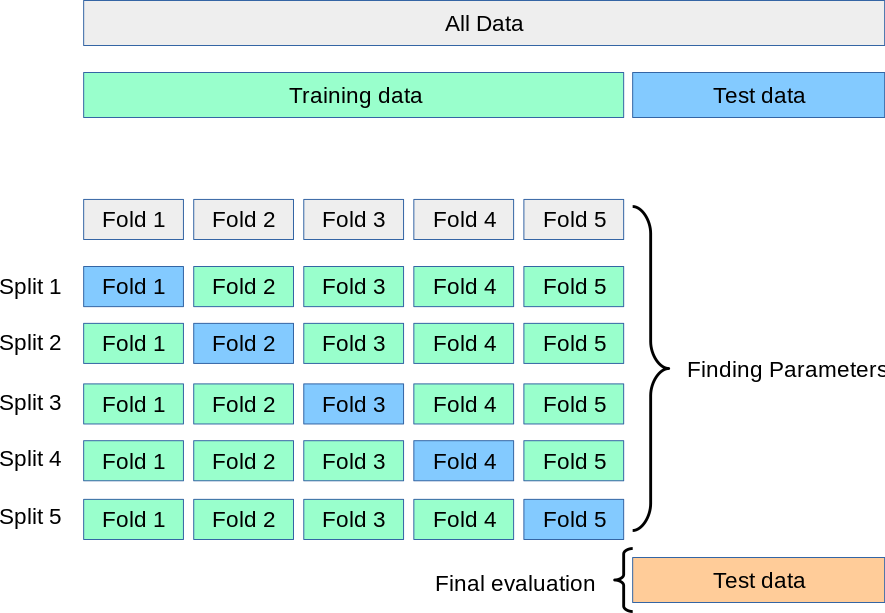

# Mean_squared_error:
    The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. ... The lower the MSE, the better the forecast.


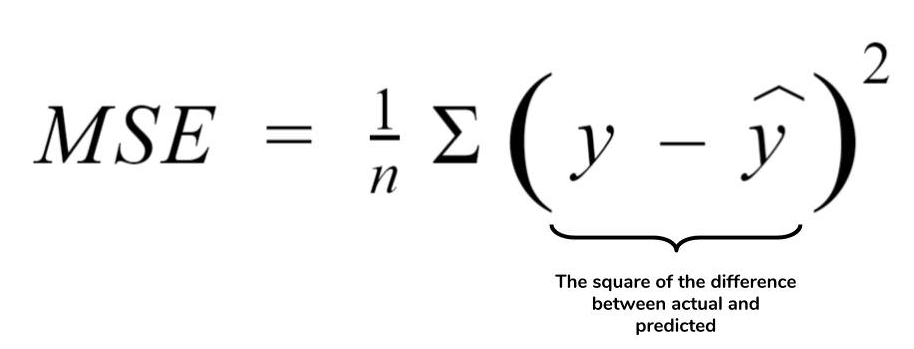

# Mean_absolute_error:
    In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. ... This is known as a scale-dependent accuracy measure and therefore cannot be used to make comparisons between series using different scales.

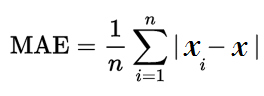

# Root_mean_squared_error:
    Root mean squared error (RMSE) is the square root of the mean of the square of all of the error. The use of RMSE is very common, and it is considered an excellent general-purpose error metric for numerical predictions.


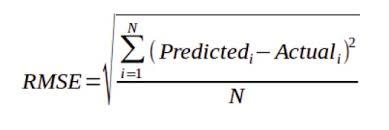

# LinearRegression:
    Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. 



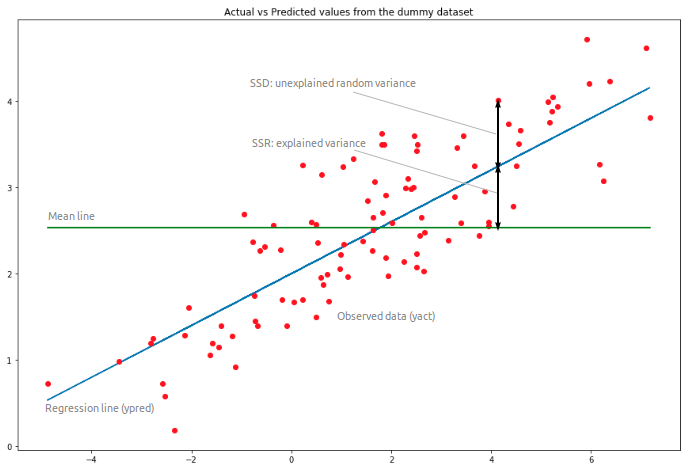

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score


In [100]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=1)


In [254]:
x_train.shape

(411, 8)

In [255]:
y_train.shape

(411,)

In [256]:
x_test.shape

(138, 8)

In [257]:
y_test.shape

(138,)

In [101]:
from sklearn.model_selection import GridSearchCV


In [229]:
parameters={'fit_intercept': (False,True),'normalize': (True, False),'copy_X': (False, True),'positive': (True,False)}
lr=LinearRegression()
gds=GridSearchCV(lr,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': (False, True),
                         'fit_intercept': (False, True),
                         'normalize': (True, False),
                         'positive': (True, False)})

In [230]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'copy_X': False, 'fit_intercept': False, 'normalize': True, 'positive': True}


In [173]:
param_grid={
    'n_jobs': list(range(1,100))}


In [174]:
lr=LinearRegression()
gds=GridSearchCV(lr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                    14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                    25, 26, 27, 28, 29, 30, ...]})

In [175]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_jobs': 1}


In [102]:
lr=LinearRegression(copy_X=False,fit_intercept=False,normalize=True,positive=True,n_jobs=1)
lr.fit(x_train,y_train)
lr.coef_

array([0.00000000e+00, 5.95834988e+01, 0.00000000e+00, 4.57155552e+00,
       1.52260185e+01, 1.38730344e-02, 2.11406431e+01, 3.80086055e+00])

In [103]:
lr.intercept_

0.0

In [104]:
pred=lr.predict(x_test)

In [105]:
print("predicted value",pred)
print("actual value",y_test)

predicted value [3249.34364686 1736.1399845  1037.32723372 ... 3000.87481861 2942.4449785
 3869.23396719]
actual value 2899    2709.1402
3172    2889.5720
7548    1534.0032
7672     474.0496
1376    1151.1682
          ...    
7572    2681.8424
170     2120.5730
5376    5275.7992
7178    2836.3080
5413    6474.2392
Name: Item_Outlet_Sales, Length: 1373, dtype: float64


In [106]:
print("error")
print("Mean absolute error of lr:",mean_absolute_error(y_test,pred))
print("Mean squared error of lr:",mean_squared_error(y_test,pred))
print("Root Mean squared error of lr:",np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error of lr: 800.3724614912865
Mean squared error of lr: 1111768.438098652
Root Mean squared error of lr: 1054.4043048558992


In [107]:
print(r2_score(y_test,pred))
print(lr.score(x_train,y_train))

0.45615334433968224
0.46584235431037746


In [108]:
scores = cross_val_score(lr, x_train, y_train, cv=5)
scores

array([0.45083173, 0.49728455, 0.4500859 , 0.45516472, 0.46730133])

In [109]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.46 accuracy with a standard deviation of 0.02


In [110]:
print(scores.mean())
print(scores.std())

0.4641336449390138
0.017684675600442602


# RidgeRegression:
    Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual value.


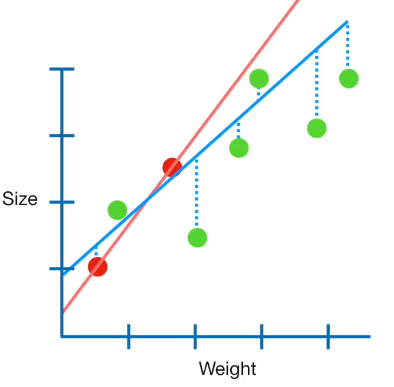

In [102]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [269]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0.005,0,1.0,1.1,1.5,1.2,1.3,1.4,1.6,1.7,1.8,1.9,1.10,0.10]}
rdg=Ridge()
gds=GridSearchCV(rdg,alphavalue)
gds.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.005, 0, 1.0,
                                   1.1, 1.5, 1.2, 1.3, 1.4, 1.6, 1.7, 1.8, 1.9,
                                   1.1, 0.1]})

In [270]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'alpha': 1.9}


In [271]:
parameters={'fit_intercept': [False,True],'normalize': [True, False],'copy_X': [False, True],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
rdg=Ridge()
gds=GridSearchCV(rdg,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'copy_X': [False, True],
                         'fit_intercept': [False, True],
                         'normalize': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [272]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'copy_X': True, 'fit_intercept': False, 'normalize': True, 'solver': 'saga'}


In [283]:
param_grid={
    'max_iter':[100,300,600,1000,1200,1500,2000,5000,10000,15000,20000]
}


In [284]:
rdg=Ridge()
gds=GridSearchCV(rdg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'max_iter': [100, 300, 600, 1000, 1200, 1500, 2000,
                                      5000, 10000, 15000, 20000]})

In [285]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_iter': 100}


In [290]:
param_grid={'random_state': list(range(1,100)),
    'tol':[0.1,0.01,0.001,0.0001,0.00001,1.0,0.14,0.18]
}

In [291]:
rdg=Ridge()
gds=GridSearchCV(rdg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0, 0.14,
                                 0.18]})

In [292]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 1, 'tol': 0.1}


In [103]:
rdg=Ridge(alpha=0.005,copy_X=True,fit_intercept=True,normalize=True,solver='saga',random_state=1,tol=0.1,max_iter=100)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.4651242937251431

In [104]:
rdg.coef_

array([  -5.06686342,   22.94255263, -880.04943518,    3.62704388,
         15.30367316,   -1.49951123,    6.37969805,   27.17705548])

In [105]:
pred=rdg.predict(x_test)
pred

array([3347.75418055, 1747.99270438, 1027.32671993, ..., 2935.25140599,
       2954.69484465, 4018.55285853])

In [106]:
r2_score(y_test,pred)

0.4540800519714364

In [107]:
print("Mean squared error of rdg:",mean_squared_error(y_test,pred))
print('Mean absolute error of rdg:',mean_absolute_error(y_test,pred))
print('Root Mean squared error of rdg:',np.sqrt(mean_squared_error(y_test,pred)))

Mean squared error of rdg: 1116006.8038107073
Mean absolute error of rdg: 802.2448349032542
Root Mean squared error of rdg: 1056.41223194864


In [108]:
scores = cross_val_score(rdg, x_train, y_train, cv=5)
scores

array([0.45042894, 0.48771873, 0.45011444, 0.44937959, 0.46389047])

In [109]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.46 accuracy with a standard deviation of 0.01


In [110]:
print(scores.mean())
print(scores.std())

0.46030643614255523
0.014731713379863082


# LassoRegresion:
    Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).


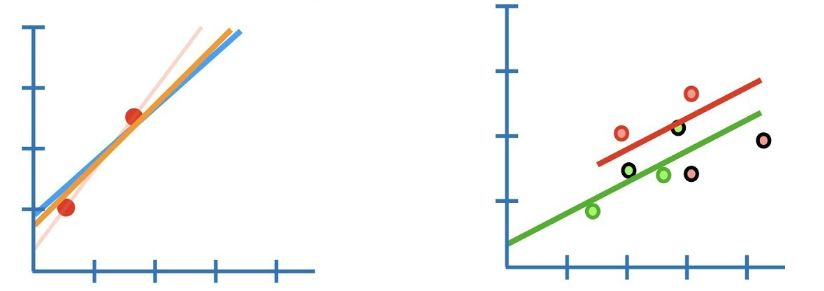

In [306]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0.005,0,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,1.0,0.10],'precompute':['auto',True,False]}
lso=Lasso()
gds=GridSearchCV(lso,alphavalue)
gds.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.005, 0, 1.0,
                                   1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 1.9, 1.0,
                                   0.1],
                         'precompute': ['auto', True, False]})

In [307]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'alpha': 1.9, 'precompute': False}


In [308]:
parameters={'fit_intercept': (False,True),'normalize': (True, False),'copy_X': (False, True),'positive': (True,False),'selection':('cyclic', 'random')}
lso=Lasso()
gds=GridSearchCV(lso,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'copy_X': (False, True),
                         'fit_intercept': (False, True),
                         'normalize': (True, False), 'positive': (True, False),
                         'selection': ('cyclic', 'random')})

In [309]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'copy_X': False, 'fit_intercept': True, 'normalize': True, 'positive': True, 'selection': 'random'}


In [310]:
param_grid={
    'max_iter':[100,300,600,1000,1200,1500,2000],
    'random_state': list(range(1,100)),
    'tol':[0.1,0.01,0.001,0.0001,0.00001,1.0,0.14,0.18],
    'warm_start':[True,False]
}


In [311]:
lso=Lasso()
gds=GridSearchCV(lso,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'max_iter': [100, 300, 600, 1000, 1200, 1500, 2000],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0, 0.14,
                                 0.18],
                         'warm_start': [True, False]})

In [312]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_iter': 100, 'random_state': 1, 'tol': 1.0, 'warm_start': True}


In [121]:
lso=Lasso(alpha=0.005,copy_X=False,fit_intercept=True,normalize=True,positive=True,selection='random',random_state=1,tol=1.0,warm_start=True,max_iter=100,precompute= False)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)
predlso=lso.predict(x_test)
r2_score(y_test,predlso)

0.4561576917558676

In [122]:
print(lso.score(x_train,y_train))  

0.46576606421216227


In [123]:
print("Mean squared error of lso:",mean_squared_error(y_test,predlso))
print('Mean absolute error of lso:',mean_absolute_error(y_test,predlso))
print('Root Mean squared error of lso:',np.sqrt(mean_squared_error(y_test,predlso)))

Mean squared error of lso: 1111759.5508138782
Mean absolute error of lso: 800.226730134668
Root Mean squared error of lso: 1054.400090484574


In [124]:
scores = cross_val_score(lso, x_train, y_train, cv=5)
scores

array([0.45040523, 0.49785807, 0.45014257, 0.45659035, 0.46701324])

In [125]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.46 accuracy with a standard deviation of 0.02


In [126]:
print(scores.mean())
print(scores.std())

0.46440189157787815
0.017812298591662834


# ElasticNetRegression:
    Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions. ... Elastic Net is an extension of linear regression that adds regularization penalties to the loss function during training.


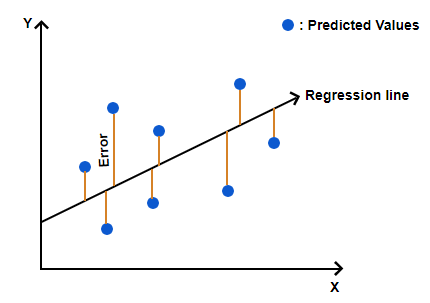

In [324]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0.005],'precompute':[True,False],'l1_ratio':[1.0,1.1,1.2,1.3,1.4,1.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6]}
enr=ElasticNet()
gds=GridSearchCV(enr,alphavalue)
gds.fit(x_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.005],
                         'l1_ratio': [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 0.0, 0.1,
                                      0.2, 0.3, 0.4, 0.5, 0.6],
                         'precompute': [True, False]})

In [325]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'alpha': 1, 'l1_ratio': 0.0, 'precompute': True}


In [331]:
parameters={'fit_intercept': (False,True),'normalize': (True, False),'copy_X': (False, True),'positive': (True,False),'selection':('cyclic', 'random')}
enr=ElasticNet()
gds=GridSearchCV(enr,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'copy_X': (False, True),
                         'fit_intercept': (False, True),
                         'normalize': (True, False), 'positive': (True, False),
                         'selection': ('cyclic', 'random')})

In [332]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'copy_X': False, 'fit_intercept': False, 'normalize': True, 'positive': True, 'selection': 'random'}


In [328]:
param_grid={
    'max_iter':[100,300,600,1000,1200,1500,2000],
    'random_state': list(range(1,100)),
    'tol':[0.1,0.01,0.001,0.0001,0.00001,1.0,0.14,0.18],
    'warm_start':[bool,False]
}


In [329]:
enr=ElasticNet()
gds=GridSearchCV(enr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'max_iter': [100, 300, 600, 1000, 1200, 1500, 2000],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0, 0.14,
                                 0.18],
                         'warm_start': [<class 'bool'>, False]})

In [330]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_iter': 100, 'random_state': 1, 'tol': 1.0, 'warm_start': <class 'bool'>}


In [128]:
enr=ElasticNet(alpha=1,copy_X=False,fit_intercept=False,normalize=True,positive=True,selection='random',random_state=1,max_iter=100,tol=1.0,warm_start=True,l1_ratio=0.0, precompute=True)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))

0.4357012148926125


In [129]:
r2_score(y_test,enrpred)

0.42701047769899625

In [130]:
enr.coef_

array([31.38232082,  0.        ,  0.16370024,  6.44143613, 12.64706677,
        0.        ,  0.        , 87.53241979])

In [131]:
print("Mean squared error of enr:",mean_squared_error(y_test,enrpred))
print('Mean absolute error of enr:',mean_absolute_error(y_test,enrpred))
print('Root Mean squared error of enr:',np.sqrt(mean_squared_error(y_test,enrpred)))

Mean squared error of enr: 1171344.2743929727
Mean absolute error of enr: 843.2605077588028
Root Mean squared error of enr: 1082.2865953124306


In [132]:
scores = cross_val_score(enr, x_train, y_train, cv=10)
scores

array([0.37143579, 0.44439206, 0.51372275, 0.42691977, 0.35189532,
       0.4615712 , 0.4202403 , 0.45457966, 0.4394336 , 0.42856665])

In [133]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.43 accuracy with a standard deviation of 0.04


In [134]:
print(scores.mean())
print(scores.std())

0.4312757103548709
0.043043178250114056


# Approaching more regressor

# DecisionTreeRegressor:
    Decision Tree - Regression. Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.


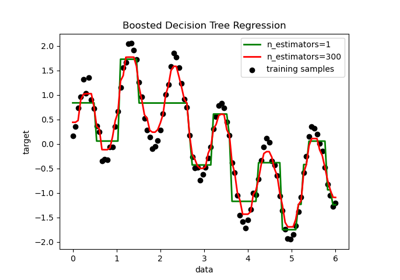

In [112]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [346]:
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10],  
              'min_samples_leaf': [1,2,3],
              'random_state': list(range(1,100))}


In [347]:
dtr=DecisionTreeRegressor()
gds=GridSearchCV(dtr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [348]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 11}


In [349]:
parameters={'criterion':('mse', 'friedman_mse', 'mae', 'poisson'),'splitter':('best', 'random'),'max_features': ('auto', 'sqrt', 'log2')} 
dtr=DecisionTreeRegressor()
gds=GridSearchCV(dtr,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('mse', 'friedman_mse', 'mae', 'poisson'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'splitter': ('best', 'random')})

In [350]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'criterion': 'mae', 'max_features': 'log2', 'splitter': 'best'}


In [351]:
param_grid={
    'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None],
    'min_weight_fraction_leaf':[0.0,0.1,0.001,0.0001],
    'min_impurity_decrease':[0.0,0.1,0.001,0.0001],
    'ccp_alpha':[0.1,0.001,0.0001,.1,1.0]
}

In [352]:
dtr=DecisionTreeRegressor()
gds=GridSearchCV(dtr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0.1, 0.001, 0.0001, 0.1, 1.0],
                         'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                            100, None],
                         'min_impurity_decrease': [0.0, 0.1, 0.001, 0.0001],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.001, 0.0001]})

In [353]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'ccp_alpha': 0.1, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.1, 'min_weight_fraction_leaf': 0.1}


In [138]:
dtr=DecisionTreeRegressor(criterion='mse',max_features='auto',splitter='best',max_depth=10,min_samples_split=2,min_samples_leaf=1,random_state=3,ccp_alpha=1.0, max_leaf_nodes= 20, min_impurity_decrease= 0.0, min_weight_fraction_leaf= 0.0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=1.0, max_depth=10, max_features='auto',
                      max_leaf_nodes=20, random_state=3)

In [139]:
print('dtr_score:',dtr.score(x_train,y_train))
dtrpredict=dtr.predict(x_test)

dtr_score: 0.4890049163769723


In [140]:
 print('dtr r2_score:',r2_score(y_test,dtrpredict))

dtr r2_score: 0.4393080797158452


In [141]:
print("Mean squared error of dtr:",mean_squared_error(y_test,dtrpredict))
print('Mean absolute error of dtr:',mean_absolute_error(y_test,dtrpredict))
print('Root Mean squared error of dtr:',np.sqrt(mean_squared_error(y_test,dtrpredict)))

Mean squared error of dtr: 1146204.677331314
Mean absolute error of dtr: 810.7716418343356
Root Mean squared error of dtr: 1070.6094887172044


In [142]:
scores = cross_val_score(dtr, x_train, y_train, cv=10)
scores

array([0.40971802, 0.49032063, 0.52239342, 0.41915455, 0.35160465,
       0.46160367, 0.37809782, 0.44590328, 0.44797942, 0.43146045])

In [143]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.44 accuracy with a standard deviation of 0.05


In [144]:
print(scores.mean())
print(scores.std())

0.4358235910880695
0.047730208943610325


# KNeighborRegressor:
    KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).


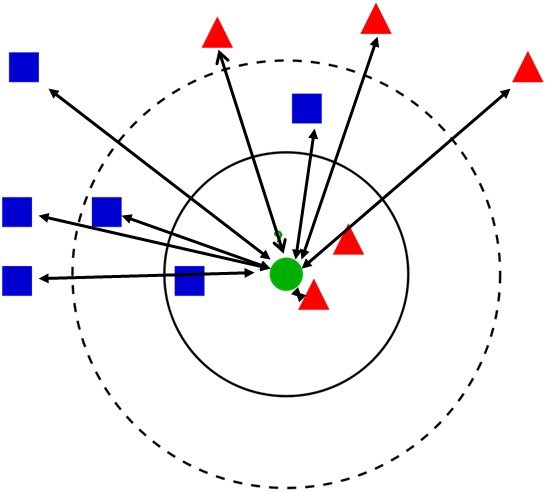

In [387]:
param_grid = {  'n_neighbors': list(range(1,30))}


In [388]:
knr=KNeighborsRegressor()
gds=GridSearchCV(knr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

In [389]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_neighbors': 26}


In [390]:
param_grid={'leaf_size': list(range(1,50))}

In [391]:
knr=KNeighborsRegressor()
gds=GridSearchCV(knr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [392]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'leaf_size': 1}


In [393]:
param_grid={'p': [1,2,3,4,5,6,7,8,9,10]}

In [394]:
knr=KNeighborsRegressor()
gds=GridSearchCV(knr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [395]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'p': 1}


In [396]:
parameters={'weights':('uniform', 'distance'),'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')}
knr=KNeighborsRegressor()
gds=GridSearchCV(knr,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'weights': ('uniform', 'distance')})

In [397]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'algorithm': 'auto', 'weights': 'uniform'}


In [398]:
param_grid={
    'n_jobs':[1,2,3,4,5,6,7,8,9,10,-1,None],
    'metric_params':[dict,None],
    'metric' :['standard Euclidean metric','minkowski','DistanceMetric']
}


In [399]:
knr=KNeighborsRegressor()
gds=GridSearchCV(knr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'metric': ['standard Euclidean metric', 'minkowski',
                                    'DistanceMetric'],
                         'metric_params': [<class 'dict'>, None],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, None]})

In [400]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1}


In [113]:
knr=KNeighborsRegressor(algorithm='auto',weights='distance',n_neighbors=26,leaf_size=1,p=1,metric_params=None,n_jobs=1,metric= 'minkowski')
knr.fit(x_train,y_train)
print('knr score:',knr.score(x_train,y_train))

knr score: 1.0


In [114]:
knrpredict=knr.predict(x_test)
print('knr r2_score:',r2_score(y_test,knrpredict))

knr r2_score: 0.45229773678386775


In [118]:
print("Mean squared error of knr:",mean_squared_error(y_test,knrpredict))
print('Mean absolute error of knr:',mean_absolute_error(y_test,knrpredict))
print('Root Mean squared error of knr:',np.sqrt(mean_squared_error(y_test,knrpredict)))

Mean squared error of knr: 1119650.3341177509
Mean absolute error of knr: 805.7790782001105
Root Mean squared error of knr: 1058.1353099286266


In [119]:
scores = cross_val_score(knr, x_train, y_train, cv=10)
scores

array([0.37588456, 0.47644379, 0.53718065, 0.41457303, 0.34844645,
       0.49913783, 0.36935345, 0.47981782, 0.43334139, 0.41949744])

In [120]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.44 accuracy with a standard deviation of 0.06


In [121]:
print(scores.mean())
print(scores.std())

0.43536764155465235
0.05851101042814


# SupportVectorRegressor:
    Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.


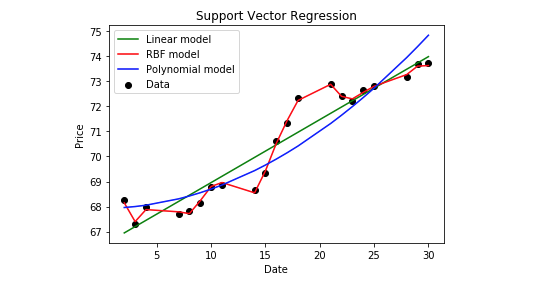

In [200]:
parameters={'kernel':('linear','rbf','poly')}
svr=SVR()
gds=GridSearchCV(svr,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SVR(), param_grid={'kernel': ('linear', 'rbf', 'poly')})

In [201]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'kernel': 'linear'}


In [202]:
parameters={'C':[1, 10,20,30,40,50,60,70,80,90,100],'gamma':('scale', 'auto'),"epsilon":[0.1,0.2,0.3,0.4,0.5]}
svr=SVR()
gds=GridSearchCV(svr,parameters)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'gamma': ('scale', 'auto')})

In [203]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}


In [204]:
param_grid={
    'max_iter':[100,300,600,1000,1200,1500,2000,-1],
    'tol':[0.1,0.01,0.001,0.0001,0.00001,1.0]
}


In [205]:
svr=SVR()
gds=GridSearchCV(svr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'max_iter': [100, 300, 600, 1000, 1200, 1500, 2000,
                                      -1],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0]})

In [206]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_iter': 300, 'tol': 0.1}


In [207]:
param_grid={'cache_size':[100,200,300,400,500,600,700,800,900,1000],
    'shrinking':[bool,True],
    'coef0':[0.0,0.1,0.001,0.0001,1.0,1]}

In [208]:
svr=SVR()
gds=GridSearchCV(svr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'cache_size': [100, 200, 300, 400, 500, 600, 700, 800,
                                        900, 1000],
                         'coef0': [0.0, 0.1, 0.001, 0.0001, 1.0, 1],
                         'shrinking': [<class 'bool'>, True]})

In [209]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'cache_size': 100, 'coef0': 0.0, 'shrinking': True}


In [220]:
svr=SVR(kernel="linear",C=100,gamma='scale',epsilon=0.5,degree=3,cache_size=100,coef0=0.0,max_iter=300,shrinking=True,tol=0.1)
svr.fit(x_train,y_train)
print('svr score:',svr.score(x_train,y_train))

svr score: -97.53477980704047


In [221]:
svrpredict=svr.predict(x_test)
print('svr r2_score:',r2_score(y_test,svrpredict))

svr r2_score: -87.77644324030138


In [222]:
print('Mean absolute error of svr:',mean_absolute_error(y_test,svrpredict))
print('Mean squared error of svr:',mean_squared_error(y_test,svrpredict))
print('Root Mean squared error of svr:',np.sqrt(mean_squared_error(y_test,svrpredict)))

Mean absolute error of svr: 10792.013025938024
Mean squared error of svr: 181482862.1523601
Root Mean squared error of svr: 13471.557525110455


In [223]:
scores = cross_val_score(svr, x_train, y_train, cv=5)
scores

array([ -5.6919083 ,  -6.62990623,  -0.5422743 , -17.77528819,
         0.16703599])

In [224]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


-6.09 accuracy with a standard deviation of 6.43


In [225]:
print(scores.mean())
print(scores.std())

-6.094468205505867
6.4330956137075


# SGDRegressor:
    The class SGDRegressor implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties to fit linear regression models. SGDRegressor is well suited for regression problems with a large number of training samples (> 10.000), for other problems we recommend Ridge, Lasso, or ElasticNet.



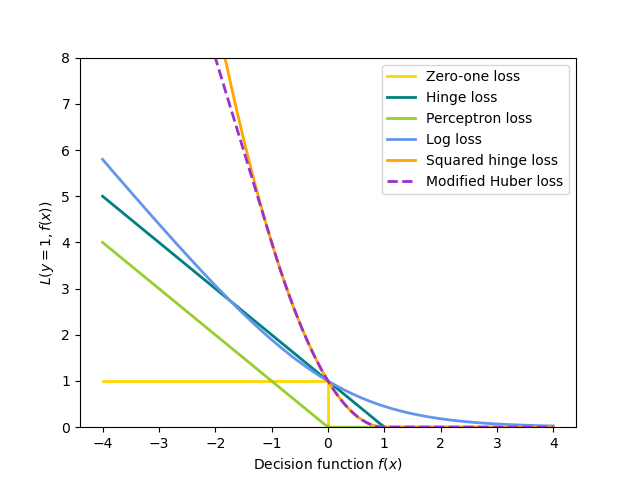

In [278]:
from sklearn.linear_model import SGDRegressor

In [282]:
param_grid={
    'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.005],
    'learning_rate':['constant','optimal','invscaling','adaptive']
}


In [283]:
sgd=SGDRegressor()
gds=GridSearchCV(sgd,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 0.005],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive']})

In [284]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'alpha': 0.01, 'learning_rate': 'adaptive'}


In [285]:
param_grid={'max_iter':[100,300,600,1000,1200,1500,2000]
}

In [286]:
sgd=SGDRegressor()
gds=GridSearchCV(sgd,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'max_iter': [100, 300, 600, 1000, 1200, 1500, 2000]})

In [287]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_iter': 300}


In [288]:
param_grid={ 'penalty':['l2','l1','elasticnet'],
    'epsilon':[0.1,0.2,0.3,0.4,0.5]
}

In [289]:
sgd=SGDRegressor()
gds=GridSearchCV(sgd,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [290]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'epsilon': 0.4, 'penalty': 'l2'}


In [291]:
param_grid={
    'random_state': list(range(1,100))}

In [292]:
sgd=SGDRegressor()
gds=GridSearchCV(sgd,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [293]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 17}


In [294]:
param_grid={
    'warm_start':[True,False],
    'power_t':['double',0.25 ],
    'l1_ratio':[0,0.1,0.5,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]}


In [295]:
sgd=SGDRegressor()
gds=GridSearchCV(sgd,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'l1_ratio': [0, 0.1, 0.5, 0.1, 0.15, 0.2, 0.25, 0.3,
                                      0.35, 0.4, 0.45, 0.5],
                         'power_t': ['double', 0.25],
                         'warm_start': [True, False]})

In [296]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'l1_ratio': 0.45, 'power_t': 0.25, 'warm_start': False}


In [297]:
param_grid={
    'n_iter_no_change':[10,50,100,200,400,500,700,1000],
    'loss':['huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'early_stopping':[True,False]
}   
  



In [298]:
sgd=SGDRegressor()
gds=GridSearchCV(sgd,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'early_stopping': [True, False],
                         'loss': ['huber', 'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'n_iter_no_change': [10, 50, 100, 200, 400, 500, 700,
                                              1000]})

In [299]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'early_stopping': True, 'loss': 'huber', 'n_iter_no_change': 700}


In [300]:
param_grid={
    'eta0':[0.01,0.1,0.001,0.0001,1.0],
    'average':[True,False],
    'shuffle':[False,True],
    'tol':[0.1,0.14,0.18,0.01,0.001,0.0001,0.00001,1.0,1e-3]}   

In [301]:
sgd=SGDRegressor()
gds=GridSearchCV(sgd,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'average': [True, False],
                         'eta0': [0.01, 0.1, 0.001, 0.0001, 1.0],
                         'shuffle': [False, True],
                         'tol': [0.1, 0.14, 0.18, 0.01, 0.001, 0.0001, 1e-05,
                                 1.0, 0.001]})

In [302]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'average': True, 'eta0': 0.0001, 'shuffle': True, 'tol': 0.0001}


In [315]:
sgd=SGDRegressor(alpha=0.01,max_iter=400,learning_rate="adaptive",penalty="l2",shuffle=True,random_state=17,warm_start=False,power_t=0.25,l1_ratio=0.45,average=True, eta0= 0.0001, tol= 0.0001,early_stopping= True, n_iter_no_change=700,loss='huber',epsilon= 0.4)
sgd.fit(x_train,y_train)
print('sgd score:',sgd.score(x_train,y_train))

sgd score: 0.46393167869536933


In [316]:
sgdpredict=sgd.predict(x_test)
print('sgd r2_score:',r2_score(y_test,sgdpredict))

sgd r2_score: 0.45417335709233586


In [317]:
print("Mean absolue error of sgd:",mean_absolute_error(y_test,sgdpredict))
print("Mean squared error of sgd:",mean_squared_error(y_test,sgdpredict))
print("Root Mean squared error of sgd:",np.sqrt(mean_squared_error(y_test,sgdpredict)))

Mean absolue error of sgd: 799.212312571703
Mean squared error of sgd: 1115816.0631167095
Root Mean squared error of sgd: 1056.3219505040636


In [318]:
scores = cross_val_score(sgd, x_train, y_train, cv=5)
scores

array([0.44841824, 0.49299898, 0.44938368, 0.45710528, 0.46745014])

In [319]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.46 accuracy with a standard deviation of 0.02


In [320]:
print(scores.mean())
print(scores.std())

0.4630712633594685
0.016446864118618527


# Approaching Ensemble Method

# RandomForestRegressor:
    Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity (it can be used for both classification and regression tasks).


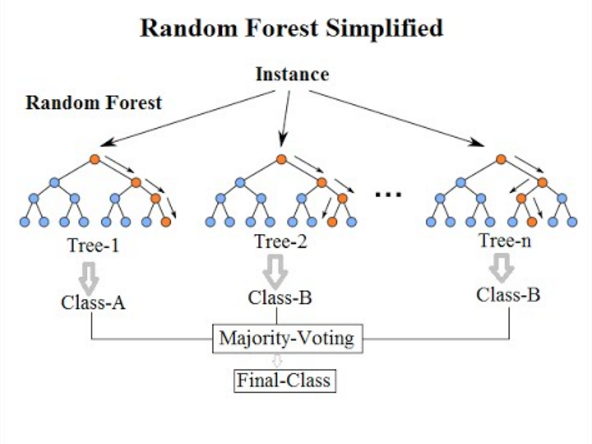

In [372]:
from sklearn.ensemble import RandomForestRegressor

In [373]:
param_grid={
 'bootstrap': [True, False],
 'min_samples_leaf': [1, 2, 4]}


In [374]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'min_samples_leaf': [1, 2, 4]})

In [375]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'bootstrap': True, 'min_samples_leaf': 4}


In [326]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'min_samples_leaf': [1, 2, 4]})

In [327]:
param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt','log2']}

In [328]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [329]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_depth': 10, 'max_features': 'sqrt'}


In [332]:
param_grid={
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [333]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]})

In [334]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_estimators': 600}


In [335]:
param_grid={
    'criterion' :['squared_error', 'mse', 'absolute_error', 'poisson']}

In [336]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson']})

In [337]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'criterion': 'mse'}


In [340]:
param_grid={
    'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None]}

In [341]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                            100, None]})

In [342]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_leaf_nodes': 10}


In [ ]:
param_grid={
    'random_state': list(range(1,100))
}


In [ ]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

In [ ]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

In [343]:
param_grid={'n_jobs':[1,2,3,4,5,6,7,8,9.10,None],
    'min_samples_split': [2, 5, 10]}

In [344]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [2, 5, 10],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9.1, None]})

In [345]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'min_samples_split': 10, 'n_jobs': 5}


In [348]:
param_grid={
    'min_weight_fraction_leaf':[0.0,0.1,0.001,0.0001],
    'min_impurity_decrease':[0.0,0.1,0.001,0.0001]}


In [349]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_impurity_decrease': [0.0, 0.1, 0.001, 0.0001],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.001, 0.0001]})

In [350]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'min_impurity_decrease': 0.1, 'min_weight_fraction_leaf': 0.1}


In [351]:
param_grid={'oob_score':[True,False],
    'ccp_alpha':[0.1,0.001,0.0001,.1,1.0]}


In [352]:
rfr=RandomForestRegressor()
gds=GridSearchCV(rfr,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.1, 0.001, 0.0001, 0.1, 1.0],
                         'oob_score': [True, False]})

In [353]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'ccp_alpha': 0.1, 'oob_score': False}


In [454]:
rfr=RandomForestRegressor(criterion='mse',max_features='sqrt',n_estimators=800,max_leaf_nodes=100,n_jobs=8,min_samples_split=2,bootstrap=True,max_depth=90,min_samples_leaf=1,random_state=33,warm_start=True,max_samples=None,ccp_alpha= 0.1, min_impurity_decrease= 0.1, min_weight_fraction_leaf= 0.0001, oob_score= True)
#RandomForestRegressor(100)by default

In [455]:
rfr.fit(x_train,y_train)
print('rfr score:',rfr.score(x_train,y_train))

rfr score: 0.5445773435856336


In [456]:
perdrfr=rfr.predict(x_test)
print('rfr r2_score:',r2_score(y_test,perdrfr))

rfr r2_score: 0.4260371458396285


In [457]:
print("Mean absolue error of rfr:",mean_absolute_error(y_test,perdrfr))
print("Mean squared error of rfr:",mean_squared_error(y_test,perdrfr))
print("Root Mean squared error of rfr:",np.sqrt(mean_squared_error(y_test,perdrfr)))

Mean absolue error of rfr: 846.6999072574006
Mean squared error of rfr: 1173334.025786639
Root Mean squared error of rfr: 1083.2054402497427


In [458]:
scores = cross_val_score(rfr, x_train, y_train, cv=5)
scores

array([0.41714531, 0.44688343, 0.42235679, 0.41226702, 0.41892443])

In [459]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.42 accuracy with a standard deviation of 0.01


In [460]:
print(scores.mean())
print(scores.std())

0.42351539611977485
0.012129209239341122


# AdaBoostRegressor:
       Adaboost stands for Adaptive Boosting and it is widely used ensemble learning algorithm in machine learning. Weak learners are boosted by improving their weights and make them vote in creating a combined final model. In this post, we'll learn how to use AdaBoostRegressor class for the regression problem. AdaboostRegressor starts fitting the regressor with the dataset and adjusts the weights according to error rate. 


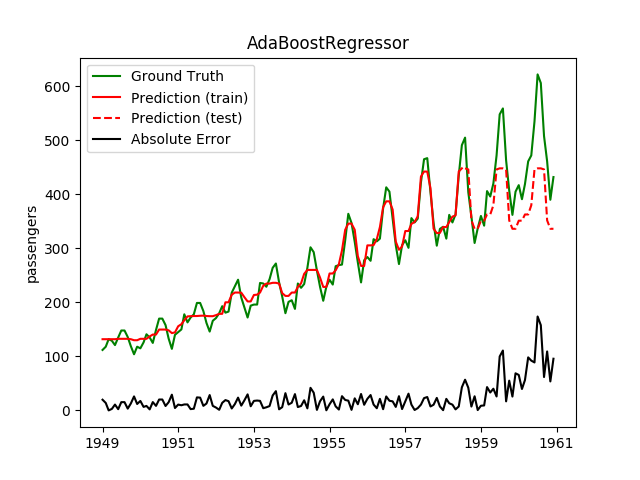

In [360]:
from sklearn.ensemble import AdaBoostRegressor

In [361]:
param_grid={'n_estimators':[50,100,500,1000,1500,2000]}
    


In [359]:
ada=AdaBoostRegressor()
gds=GridSearchCV(ada,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'n_estimators': [50, 100, 500, 1000, 1500, 2000]})

In [362]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_estimators': 1000}


In [363]:
param_grid={'learning_rate':[.0001,.001,0.01,.1,1.0],'loss': ['linear', 'square', 'exponential']}
    

In [364]:
ada=AdaBoostRegressor()
gds=GridSearchCV(ada,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'loss': ['linear', 'square', 'exponential']})

In [365]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'learning_rate': 0.0001, 'loss': 'linear'}


In [366]:
param_grid={
    'random_state': list(range(1,100))}


In [367]:
ada=AdaBoostRegressor()
gds=GridSearchCV(ada,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [368]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 45}


In [396]:
ada=AdaBoostRegressor(loss='linear',n_estimators=1000,random_state=45,learning_rate=0.0001)


In [397]:
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(predada)

[3703.76062422 1617.42634358 1063.05493935 ... 2966.78019769 2966.78019769
 3717.67388374]


In [398]:
print('ada score:',ada.score(x_train,y_train))
print('ada r2_score:',r2_score(y_test,predada))

ada score: 0.47259487183231363
ada r2_score: 0.4543472091433032


In [399]:
print("Mean absolue error of ada:",mean_absolute_error(y_test,predada))
print("Mean squared error of ada:",mean_squared_error(y_test,predada))
print("Root Mean squared error of ada:",np.sqrt(mean_squared_error(y_test,predada)))

Mean absolue error of ada: 800.8626989540555
Mean squared error of ada: 1115460.662892855
Root Mean squared error of ada: 1056.1537117734592


In [400]:
scores = cross_val_score(ada, x_train, y_train, cv=5)
scores

array([0.45928393, 0.48730146, 0.45089829, 0.45868407, 0.45743275])

In [401]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.46 accuracy with a standard deviation of 0.01


In [402]:
print(scores.mean())
print(scores.std())

0.46272010044420087
0.012649517387141727


# GradientBoostRegressor:
    Gradient Boosting algorithm is used to generate an ensemble model by combining the weak learners or weak predictive models. Gradient boosting algorithm can be used to train models for both regression and classification problem. Gradient Boosting Regression algorithm is used to fit the model which predicts the continuous value.



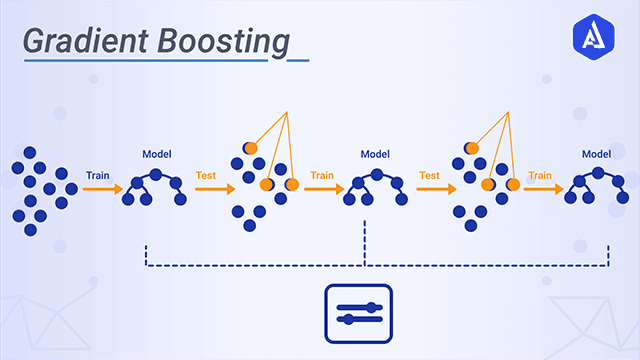

In [403]:
from sklearn.ensemble import GradientBoostingRegressor

In [404]:
param_grid={
 'max_features': ['auto', 'sqrt','log2'],
 'min_samples_leaf': [1, 2, 4]}


In [405]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4]})

In [406]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_features': 'sqrt', 'min_samples_leaf': 1}


In [407]:
param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}

In [408]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None]})

In [409]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_depth': 10}


In [410]:
param_grid={
 'min_samples_split': [2, 5, 10],
  'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
   'init':['estimator','zero',None]
}


In [411]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'init': ['estimator', 'zero', None],
                         'min_samples_split': [2, 5, 10],
                         'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                       0.9]})

In [412]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'init': 'zero', 'min_samples_split': 10, 'subsample': 0.8}


In [413]:
param_grid={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [414]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]})

In [415]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_estimators': 200}


In [416]:
param_grid={ 'criterion' :['mse','mae','friedman_mse', 'squared_error']}


In [417]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse',
                                       'squared_error']})

In [418]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'criterion': 'friedman_mse'}


In [419]:
param_grid={
    'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None],
    'alpha':[0.1,0.001,0.0001,.1,1.0]}


In [420]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.1, 0.001, 0.0001, 0.1, 1.0],
                         'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                            100, None]})

In [421]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'alpha': 0.1, 'max_leaf_nodes': 80}


In [424]:
param_grid={
    'random_state': list(range(1,100))}

In [425]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [426]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 21}


In [427]:
param_grid={'ccp_alpha':[0.1,0.001,0.0001,.1,1.0],
    'tol':[0.1,0.14,0.18,0.01,0.001,0.0001,0.00001,1.0,1e-3],
    'warm_start':[True,False]}

In [428]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'ccp_alpha': [0.1, 0.001, 0.0001, 0.1, 1.0],
                         'tol': [0.1, 0.14, 0.18, 0.01, 0.001, 0.0001, 1e-05,
                                 1.0, 0.001],
                         'warm_start': [True, False]})

In [429]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'ccp_alpha': 1.0, 'tol': 0.14, 'warm_start': False}


In [430]:
param_grid={
    'min_weight_fraction_leaf':[0.0,0.1,0.001,0.0001],
    'n_iter_no_change':[10,50,100,200,500,1000,None]}


In [431]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'min_weight_fraction_leaf': [0.0, 0.1, 0.001, 0.0001],
                         'n_iter_no_change': [10, 50, 100, 200, 500, 1000,
                                              None]})

In [432]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'min_weight_fraction_leaf': 0.1, 'n_iter_no_change': 50}


In [433]:
param_grid={'loss':['ls', 'lad', 'huber', 'quantile','squared_error','absolute_error'],
    'min_impurity_decrease':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10]}


In [434]:
grid=GradientBoostingRegressor()
gds=GridSearchCV(grid,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'loss': ['ls', 'lad', 'huber', 'quantile',
                                  'squared_error', 'absolute_error'],
                         'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                   0.6, 0.7, 0.8, 0.9, 0.1]})

In [435]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'loss': 'lad', 'min_impurity_decrease': 0.7}


In [449]:
grid=GradientBoostingRegressor(criterion='friedman_mse',loss='ls',max_features='sqrt',random_state=17,max_depth=90,min_samples_leaf=2,min_samples_split=5,n_estimators=400,subsample=0.6,alpha=0.1,max_leaf_nodes=80,warm_start=True,min_weight_fraction_leaf=0.001,n_iter_no_change=200,init=None,min_impurity_decrease= 0.1,tol= 1.0,ccp_alpha= 1.0 )
grid.fit(x_train,y_train)
predgrid=grid.predict(x_test)
print(predgrid)

[4146.33566571 2226.30787836 1039.50223694 ... 3057.06190276 2806.94702774
 5564.07370452]


In [450]:
print('Gradient score:',grid.score(x_train,y_train))
print('Gradient r2_score:',r2_score(y_test,predgrid))

Gradient score: 0.8734779533031444
Gradient r2_score: 0.36971095010923105


In [451]:
print("Mean absolue error of grid:",mean_absolute_error(y_test,predgrid))
print("Mean squared error of grid:",mean_squared_error(y_test,predgrid))
print("Root Mean squared error of grid:",np.sqrt(mean_squared_error(y_test,predgrid)))

Mean absolue error of grid: 867.8556193421298
Mean squared error of grid: 1288479.8780217513
Root Mean squared error of grid: 1135.112275513639


In [452]:
scores = cross_val_score(grid, x_train, y_train, cv=10)
scores

array([0.31238726, 0.42486777, 0.45444792, 0.28469124, 0.24429314,
       0.38934503, 0.23700457, 0.37206079, 0.29933151, 0.36301342])

In [453]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.34 accuracy with a standard deviation of 0.07


In [461]:
print(scores.mean())
print(scores.std())

0.42351539611977485
0.012129209239341122


In [462]:
from xgboost.sklearn import XGBRegressor

In [463]:
param_grid={  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [464]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [465]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_estimators': 200}


In [469]:
param_grid={'max_depth': [3,5,7,9,11,13,15,17,18,19,20,30,50,60,70,80,90,100 ,None]}

In [470]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [471]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_depth': 3}


In [474]:
param_grid={'min_child_weight':[1,2,3,4,5,6,7,8,9,10]}

In [475]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [476]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'min_child_weight': 9}


In [505]:
param_grid={'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10],
     'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

In [506]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [507]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'gamma': 0.1, 'subsample': 0.9}


In [479]:
param_grid={ 'colsample_bytree':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.75,0.80,0.95,0.100]}

In [480]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [481]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'colsample_bytree': 0.1}


In [482]:
param_grid={ 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
      'eta': [.3, .2, .1, .05, .01, .005]}

In [483]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [484]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'eta': 0.05, 'reg_alpha': 100}


In [487]:
param_grid={'learning_rate':[.0001,.001,0.01,.1,1.0]}


In [488]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [489]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'learning_rate': 0.1}


In [492]:
param_grid={'random_state': list(range(1,100))}


In [493]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [494]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 1}


In [495]:
param_grid={'booster':['gbtree','gblinear'],
           'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None],
           'nthread':[1,2,3,4,5,6,7,8,9,10]}

In [496]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

[02:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_leaf_nodes" } might not be used.


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [497]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'booster': 'gblinear', 'max_leaf_nodes': None, 'nthread': 6}


In [498]:
param_grid={ 'n_jobs':[1,2,3,4,5,6,7,8,9.10,None],
           'colsample_bylevel':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,None]}


In [499]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [500]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'colsample_bylevel': 0.1, 'n_jobs': 1}


In [501]:
param_grid={  'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.005],
           'lambda':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,None]}


In [502]:
xg = XGBRegressor()
gds=GridSearchCV(xg,param_grid)
gds.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [503]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'alpha': 0.1, 'lambda': 0.5}


In [516]:
xg = XGBRegressor(n_estimators= 400,max_depth= 5, subsample= 0.7,gamma= 0.7, min_child_weight= 2,colsample_bytree= 0.5, eta= 0.1,reg_alpha= 1e-05,learning_rate= 0.1, random_state= 1,booster='gbtree',nthread=1,colsample_bylevel=0.5,n_jobs=1,reg_lambda=1,alpha=0.0001)
xg.fit(x_train,y_train)
predxg=xg.predict(x_test)
print(predxg)

[3550.605   2337.8691   842.76953 ... 2869.9402  2758.2253  4601.0957 ]


In [517]:
print('xgboost score:',xg.score(x_train,y_train))
print('xgboost r2_score:',r2_score(y_test,predxg))

xgboost score: 0.7594582718127598
xgboost r2_score: 0.40066183464405347


In [518]:
print("Mean absolue error of xg:",mean_absolute_error(y_test,predxg))
print("Mean squared error of xg:",mean_squared_error(y_test,predxg))
print("Root Mean squared error of xg:",np.sqrt(mean_squared_error(y_test,predxg)))

Mean absolue error of xg: 837.0679156805295
Mean squared error of xg: 1225207.9681940228
Root Mean squared error of xg: 1106.8911275252065


In [525]:
scores = cross_val_score(xg, x_train, y_train, cv=10)
scores

array([0.34009906, 0.42270976, 0.46723745, 0.32978341, 0.23855481,
       0.43846935, 0.27389516, 0.41347399, 0.35734077, 0.38869125])

In [526]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.37 accuracy with a standard deviation of 0.07


In [527]:
print(scores.mean())
print(scores.std())

0.36702550025206454
0.06946800650593152


# conclusion

In [172]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rdg.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,2709.1402,3347.754181
1,2889.5720,1747.992704
2,1534.0032,1027.326720
3,474.0496,1976.154700
4,1151.1682,2632.745066
...,...,...
1368,2681.8424,2185.631519
1369,2120.5730,2661.763265
1370,5275.7992,2935.251406
1371,2836.3080,2954.694845


# Model Saving and predictions of a test data

In [174]:
import pickle

In [175]:
# Save to file in the current working directory
pkl_filename = "bigdatamart_sales.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rdg, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict test data 
score = pickle_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(test_x) #here predict the test data

Test score: 45.41 %


In [176]:
#prediction of a test data of a house price predictions 
Ypredict

array([1750.09001887, 1477.11759038, 2548.3609872 , ..., 1917.58227464,
       3362.22391517, 1301.42543612])

In [177]:
#To save the files
df=pd.DataFrame(Ypredict)
df.to_csv("bigdatamart_sales_pred_submission.csv")

In [124]:
import pandas as pd
test_df=pd.read_csv('bigdatamart_test.csv')
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [125]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


it shows the top five rows data in the dataset

In [126]:
test_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


 it shows the below five rows data in the dataset

In [127]:
test_df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4940,FDQ14,9.27,Low Fat,0.062137,Dairy,150.6050,OUT017,2007,NaN,Tier 2,Supermarket Type1
2142,FDD22,NaN,Low Fat,0.099167,Snack Foods,113.1544,OUT027,1985,Medium,Tier 3,Supermarket Type3
4615,FDM39,6.42,Low Fat,0.053773,Dairy,179.0002,OUT017,2007,NaN,Tier 2,Supermarket Type1
2608,FDN12,15.60,Low Fat,0.081230,Baking Goods,109.8544,OUT049,1999,Medium,Tier 1,Supermarket Type1
1627,FDV31,9.80,Low Fat,0.107321,Fruits and Vegetables,176.3370,OUT017,2007,NaN,Tier 2,Supermarket Type1


it shows the any of the sample rows data in the dataset

In [128]:
test_df.shape

(5681, 11)

it shows the how many number of rows and columns in the dataset

In [129]:
test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

it shows the all columns name in the dataset

In [130]:
test_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

it will give the dtypes of data ie float int and object with columns name

In [131]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


It will shows the basic information about the data like how many columns and rows in the data and null value count
and dtype float or object or int

In [132]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

here showing that in a item_weight,outlet_type columns having a null value 

<AxesSubplot:>

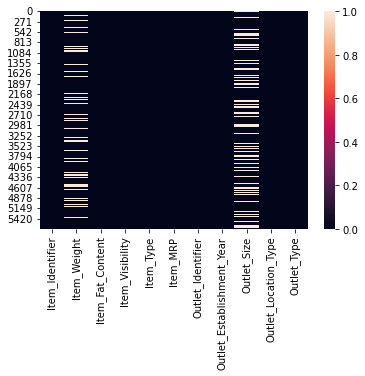

In [133]:
import seaborn as sns
sns.heatmap(test_df.isnull())

here showing that value is missing in datasets

In [134]:
test_df.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

it shows the unique value no duplicate 

In [135]:
#frist step to find out the  which columns has null value is presented 
features_with_na=[features for features in test_df.columns if test_df[features].isnull().sum()>0] 
#step2 to print the columns name and the percentage of missing values
for features in features_with_na:
    print(features,np.round(test_df[features].isnull().mean(),4),  '% missing values' )

Item_Weight 0.1718 % missing values
Outlet_Size 0.2827 % missing values


In [136]:
test_df["Item_Weight"]=test_df["Item_Weight"].fillna(test_df["Item_Weight"].mean())

In [137]:
test_df["Outlet_Size"]=test_df["Outlet_Size"].fillna(test_df["Outlet_Size"].mode()[0])


In [138]:
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<AxesSubplot:>

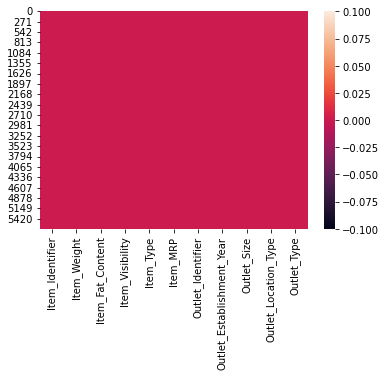

In [139]:
import seaborn as sns
sns.heatmap(test_df.isnull())

In [140]:
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


describe():- The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.


# key observations:
    std is high in columns like Item_MRP,Outlet_Establishment_Year,	Item_Outlet_Sales  is grether than 3std it means data is spread out and possibility is having outlier is present.
    mean is grether than median in a columns tem_MRP,Outlet_Establishment_Year,	Item_Outlet_Sales it means right skewed data in those columns.
    there is a difference between min value and 25th percentile in a  columns liitem_weight,item_MRP,Outlet_Establishment_Year,	Item_Outlet_Sales ,possibility is having a outliers there is outliers is present in a columns newspaper.
    also range of difference between 75th percentile and max value it means possibilities is having a outliers are present

Item_Weight                     AxesSubplot(0.125,0.536818;0.352273x0.343182)
Item_Visibility              AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Item_MRP                           AxesSubplot(0.125,0.125;0.352273x0.343182)
Outlet_Establishment_Year       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

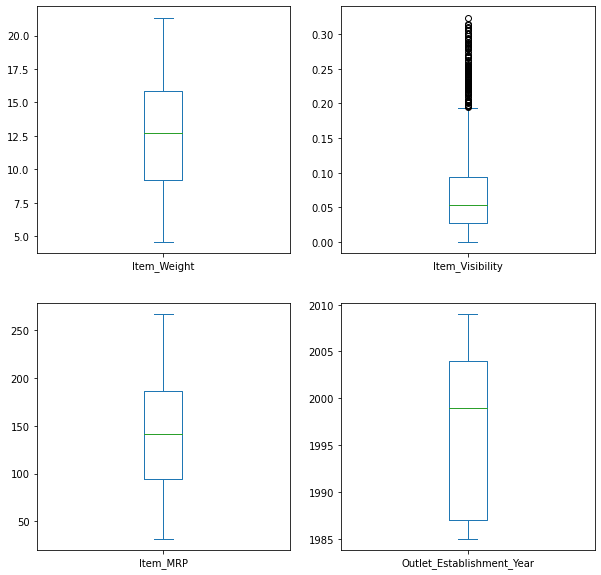

In [141]:
test_df.plot(kind='box',subplots=True,layout=(2,2),figsize=(10,10))

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.


Observations:
    here showing that in a columns are item_visbility outliers are presented

In [142]:
#this columns are not required for modeling and visualizations this a unique product id
test_df.drop(['Item_Identifier'],axis=1,inplace=True)

In [143]:
#this columns are not required for modeling and visualizations this a unique store id
test_df.drop(['Outlet_Identifier'],axis=1,inplace=True)

In [144]:
test_df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [145]:
#separate the categorical feature from datasets for analysis 
categorical_features=[feature for feature in test_df.columns if test_df[feature].dtype=='O']
print("number of categorical features:", len(categorical_features))

number of categorical features: 5


In [146]:
categorical_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [147]:
 test_df[categorical_features].head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,Medium,Tier 1,Supermarket Type1
1,Regular,Dairy,Medium,Tier 2,Supermarket Type1
2,Low Fat,Others,Medium,Tier 3,Grocery Store
3,Low Fat,Snack Foods,Medium,Tier 2,Supermarket Type1
4,Regular,Dairy,Medium,Tier 3,Supermarket Type3


In [148]:
#separate the list of numerical variables and print out the numerical features
numerical_features =[feature for feature in test_df.columns if test_df[feature].dtypes != 'object' ]
print("number of numerical variables: " , len(numerical_features))

number of numerical variables:  4


In [149]:
numerical_features

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [150]:
#head of numerical features
test_df[numerical_features].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750000,0.007565,107.8622,1999
1,8.300000,0.038428,87.3198,2007
2,14.600000,0.099575,241.7538,1998
3,7.315000,0.015388,155.0340,2007
4,12.695633,0.118599,234.2300,1985


Lets consider it like missing information and impute it with mean visibility of that product.


In [151]:
test_df['Item_Visibility']=test_df['Item_Visibility'].replace(0,test_df['Item_Visibility'].mean())

# Features Encoding

In [152]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [153]:
for val in categorical_features:
    le=LabelEncoder()
    test_df[val]=le.fit_transform(test_df[val].astype(str))

In [154]:
test_df[categorical_features].head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,13,1,0,1
1,1,4,1,1,1
2,0,11,1,2,0
3,0,13,1,1,1
4,1,4,1,2,3


# Correlations

In [155]:
dfc=test_df.corr()
dfc

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Weight,1.000000,-0.043439,-0.012469,0.029657,0.045257,0.013548,0.014735,-0.011356,0.005080
Item_Fat_Content,-0.043439,1.000000,0.046008,-0.160149,-0.019244,-0.004378,-0.000652,0.005827,-0.003864
Item_Visibility,-0.012469,0.046008,1.000000,-0.040439,-0.014184,-0.104073,0.059787,-0.006749,-0.164664
Item_Type,0.029657,-0.160149,-0.040439,1.000000,0.060990,0.000204,-0.003729,0.000584,0.006179
Item_MRP,0.045257,-0.019244,-0.014184,0.060990,1.000000,-0.007233,-0.011717,0.001754,0.003326
Outlet_Establishment_Year,0.013548,-0.004378,-0.104073,0.000204,-0.007233,1.000000,0.193397,-0.089496,-0.122841
Outlet_Size,0.014735,-0.000652,0.059787,-0.003729,-0.011717,0.193397,1.000000,-0.614284,-0.201538
Outlet_Location_Type,-0.011356,0.005827,-0.006749,0.000584,0.001754,-0.089496,-0.614284,1.000000,0.467299
Outlet_Type,0.005080,-0.003864,-0.164664,0.006179,0.003326,-0.122841,-0.201538,0.467299,1.000000


<AxesSubplot:>

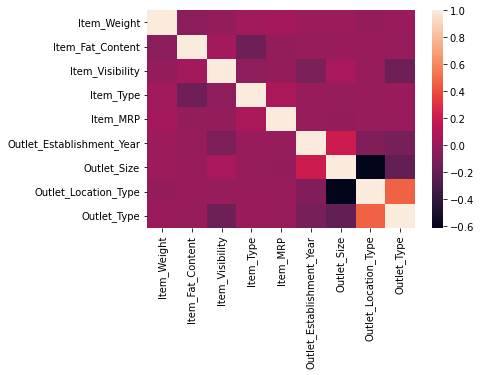

In [156]:
sns.heatmap(dfc)

<AxesSubplot:>

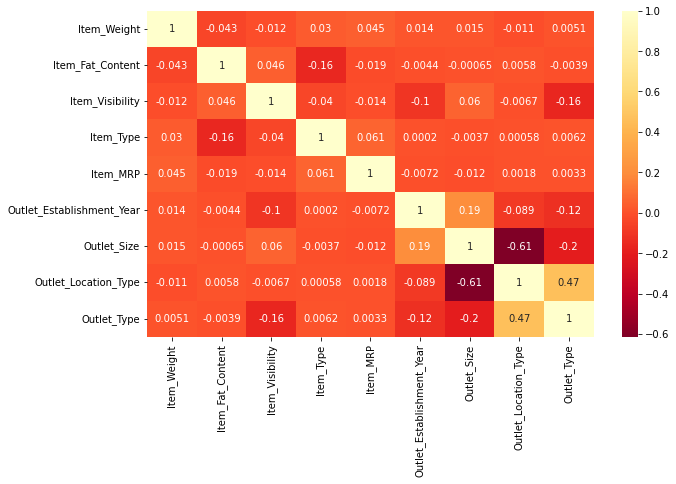

In [157]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(dfc,cmap="YlOrRd_r",annot=True)

The corr value is a number between -1 and 1. It tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1, the stronger the positive correlation. The closer to -1, the stronger the negative correlation (i.e., the more “opposite” the columns are). The closer to 0, the weaker the correlation.


# Removing the outliers:

In [158]:
from scipy.stats import zscore
import numpy as np

In [159]:
z=np.abs(zscore(test_df))
z

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.897460e+00,0.740811,1.285395,1.366916,0.536555,0.139891,0.284737,1.369215,0.252769
1,1.035530e+00,1.349873,0.647603,0.766450,0.868937,1.095512,0.284737,0.138827,0.252769
2,4.486336e-01,0.740811,0.616028,0.892835,1.629848,0.020438,0.284737,1.091560,1.507994
3,1.267578e+00,0.740811,1.123718,1.366916,0.226697,1.095512,0.284737,0.138827,0.252769
4,5.230960e-14,1.349873,1.009174,0.766450,1.508110,1.532446,0.284737,1.091560,2.257683
...,...,...,...,...,...,...,...,...,...
5676,5.172506e-01,1.349873,1.162816,1.366916,0.004727,0.099015,1.381166,1.369215,0.252769
5677,1.200437e+00,1.349873,1.513236,1.840998,0.455014,1.334417,0.284737,1.091560,1.002457
5678,6.350414e-01,0.740811,0.077770,0.181713,0.360485,0.498248,0.284737,0.138827,0.252769
5679,6.135406e-01,1.349873,0.084344,1.003490,1.190844,1.095512,0.284737,0.138827,0.252769


The abs() function of Pythons standard library returns the absolute value of the given number. Absolute value of a number is the value without considering its sign. Hence absolute of 10 is 10, -10 is also 10. If the number is a complex number, abs() returns its magnitude.
It will make all the data positive


In [160]:
threshold=3
print(np.where(z>3))

(array([  46,   76,   78,   89,  138,  242,  333,  385,  474,  543,  637,
        858,  871, 1046, 1191, 1256, 1270, 1411, 1516, 1547, 1577, 1616,
       1710, 1812, 1823, 1857, 1915, 1919, 2019, 2179, 2230, 2365, 2380,
       2393, 2504, 2516, 2561, 2605, 2609, 2625, 2628, 2652, 2677, 2721,
       2779, 2836, 2837, 2843, 3231, 3267, 3294, 3313, 3316, 3346, 3378,
       3502, 3638, 3679, 3970, 4052, 4147, 4159, 4208, 4255, 4328, 4365,
       4421, 4575, 4616, 4689, 4801, 4804, 4846, 4919, 4976, 4999, 5121,
       5157, 5277, 5290, 5435, 5469, 5482, 5514, 5571, 5668], dtype=int64), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64))


In [161]:
Q1=test_df.quantile(0.25)
Q1

Item_Weight                     9.195000
Item_Fat_Content                0.000000
Item_Visibility                 0.033208
Item_Type                       4.000000
Item_MRP                       94.412000
Outlet_Establishment_Year    1987.000000
Outlet_Size                     1.000000
Outlet_Location_Type            0.000000
Outlet_Type                     1.000000
Name: 0.25, dtype: float64

In [162]:
Q3=test_df.quantile(0.75)
Q3

Item_Weight                    15.850000
Item_Fat_Content                1.000000
Item_Visibility                 0.093463
Item_Type                      10.000000
Item_MRP                      186.026600
Outlet_Establishment_Year    2004.000000
Outlet_Size                     2.000000
Outlet_Location_Type            2.000000
Outlet_Type                     1.000000
Name: 0.75, dtype: float64

In [163]:
IQR=Q3-Q1
IQR

Item_Weight                   6.655000
Item_Fat_Content              1.000000
Item_Visibility               0.060255
Item_Type                     6.000000
Item_MRP                     91.614600
Outlet_Establishment_Year    17.000000
Outlet_Size                   1.000000
Outlet_Location_Type          2.000000
Outlet_Type                   0.000000
dtype: float64

In [164]:
# REMOVING OUTLIERS USING IQR METHOD
df_new_test = test_df[~((test_df < (Q1 - 1.5 * IQR)) |(test_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_new_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,0,0.007565,13,107.8622,1999,1,0,1
1,8.300,1,0.038428,4,87.3198,2007,1,1,1
3,7.315,0,0.015388,13,155.0340,2007,1,1,1
5,9.800,1,0.063817,6,117.1492,1997,2,0,1
8,6.305,1,0.123365,13,95.7436,2002,1,1,1
...,...,...,...,...,...,...,...,...,...
5675,13.000,1,0.070411,13,63.4484,1999,1,0,1
5676,10.500,1,0.013496,13,141.3154,1997,2,0,1
5678,10.000,0,0.073529,8,118.7440,2002,1,1,1
5679,15.300,1,0.065684,3,214.6218,2007,1,1,1


In [165]:
print("shape before and after")
print("shape before".ljust(20),":", test_df.shape)
print("shape after".ljust(20),":", df_new_test.shape)
print("Percentage Loss".ljust(20),":", (test_df.shape[0]-df_new_test.shape[0])/test_df.shape[0])

shape before and after
shape before         : (5681, 9)
shape after          : (3710, 9)
Percentage Loss      : 0.34694596021827145


In [166]:
selected_feat

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type'],
      dtype='object')

In [167]:
test_x=df_new_test[selected_feat]
test_x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type
0,20.750,0,0.007565,13,107.8622,1999,1,0
1,8.300,1,0.038428,4,87.3198,2007,1,1
3,7.315,0,0.015388,13,155.0340,2007,1,1
5,9.800,1,0.063817,6,117.1492,1997,2,0
8,6.305,1,0.123365,13,95.7436,2002,1,1
...,...,...,...,...,...,...,...,...
5675,13.000,1,0.070411,13,63.4484,1999,1,0
5676,10.500,1,0.013496,13,141.3154,1997,2,0
5678,10.000,0,0.073529,8,118.7440,2002,1,1
5679,15.300,1,0.065684,3,214.6218,2007,1,1


# Preprocessing of data

In [168]:
from sklearn.preprocessing import power_transform

In [169]:
df_new_test=power_transform(df_new_test,method="yeo-johnson")
df_new_test

array([[ 1.58186839, -0.73836949, -1.80889731, ..., -0.26982298,
        -1.27867131,  0.        ],
       [-0.93115419,  1.35433548, -0.56764601, ..., -0.26982298,
         0.34191274,  0.        ],
       [-1.18869327, -0.73836949, -1.45601321, ..., -0.26982298,
         0.34191274,  0.        ],
       ...,
       [-0.51649237, -0.73836949,  0.44488243, ..., -0.26982298,
         0.34191274,  0.        ],
       [ 0.60491256,  1.35433548,  0.24815316, ..., -0.26982298,
         0.34191274,  0.        ],
       [-0.63495331,  1.35433548,  1.09427666, ..., -0.26982298,
         0.34191274,  0.        ]])

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, power_transform supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

By default, zero-mean, unit-variance normalization is applied to the transformed data.

In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
sc=StandardScaler()
df_new_test=sc.fit_transform(df_new_test)
df_new_test

array([[ 1.58186839, -0.73836949, -1.80889731, ..., -0.26982298,
        -1.27867131,  0.        ],
       [-0.93115419,  1.35433548, -0.56764601, ..., -0.26982298,
         0.34191274,  0.        ],
       [-1.18869327, -0.73836949, -1.45601321, ..., -0.26982298,
         0.34191274,  0.        ],
       ...,
       [-0.51649237, -0.73836949,  0.44488243, ..., -0.26982298,
         0.34191274,  0.        ],
       [ 0.60491256,  1.35433548,  0.24815316, ..., -0.26982298,
         0.34191274,  0.        ],
       [-0.63495331,  1.35433548,  1.09427666, ..., -0.26982298,
         0.34191274,  0.        ]])

# 😊The End😊